## Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import re 
import warnings 
warnings.filterwarnings(action='ignore')
import itertools 
from datetime import datetime 
import datetime as dt

# Loading Dataset

In [2]:
#Loading the dataset
df = pd.read_csv('calving_data_28.csv')

# Basic Coding 

In [3]:
#Loading first five rows of dataset
df.head()

,date,calv_date,calv_time,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,manner_of_calving,offspring,parity,days_after_calving
0,24/12/2021,24/12/2021,8:04,3,2,204,--,--,--,Normal,1,multiparous,0
1,25/12/2021,24/12/2021,8:04,3,2,240,453,45,5,Normal,1,multiparous,1
2,26/12/2021,24/12/2021,8:04,3,2,304,481,25,5.6,Normal,1,multiparous,2
3,27/12/2021,24/12/2021,8:04,3,2,155,547,26,2.9,Normal,1,multiparous,3
4,28/12/2021,24/12/2021,8:04,3,2,178,528,33,3.3,Normal,1,multiparous,4


In [4]:
#Loading the last five rows of dataset
df.tail()

,date,calv_date,calv_time,cow_id,lact_no,activity,rest_time,rest_per_bout,restlessness_ratio,manner_of_calving,offspring,parity,days_after_calving
10116,02/10/2022,08/09/2022,11:36,1879,1,153,667,42,2,Normal,1,primiparous,24
10117,03/10/2022,08/09/2022,11:36,1879,1,119,738,49,1.6,Normal,1,primiparous,25
10118,04/10/2022,08/09/2022,11:36,1879,1,124,742,57,1.6,Normal,1,primiparous,26
10119,05/10/2022,08/09/2022,11:36,1879,1,182,601,55,2.4,Normal,1,primiparous,27
10120,06/10/2022,08/09/2022,11:36,1879,1,120,706,71,1.7,Normal,1,primiparous,28


In [5]:
#Shape of dataset containing 10121 rows and 13 columns
df.shape

(10121, 13)

In [6]:
#Statistical features of dataset
df.describe()

,cow_id,lact_no,offspring,days_after_calving
count,10121.000000,10121.000000,10121.000000,10121.000000
mean,1155.702006,1.421203,1.008596,14.000000
std,2082.625423,0.747685,0.092320,8.367014
min,3.000000,1.000000,1.000000,0.000000
25%,734.000000,1.000000,1.000000,7.000000
50%,1099.000000,1.000000,1.000000,14.000000
75%,1625.000000,2.000000,1.000000,21.000000
max,38656.000000,4.000000,2.000000,28.000000


In [7]:
#Loading the basic inforamtion of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                10121 non-null  object
 1   calv_date           10121 non-null  object
 2   calv_time           10121 non-null  object
 3   cow_id              10121 non-null  int64 
 4   lact_no             10121 non-null  int64 
 5   activity            10121 non-null  object
 6   rest_time           10121 non-null  object
 7   rest_per_bout       10121 non-null  object
 8   restlessness_ratio  10121 non-null  object
 9   manner_of_calving   10121 non-null  object
 10  offspring           10121 non-null  int64 
 11  parity              10121 non-null  object
 12  days_after_calving  10121 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.0+ MB


## Cleaning Section

In [8]:
#Repalcing the "--" values in the dataset
df = df.replace("\--", " ", regex=True).astype('str')

In [9]:
#Replacing the rows containing -- values into NAN values
df = df.replace(r'^\s*$', np.nan, regex=True)

In [10]:
#Checking the total missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

rest_time             560
rest_per_bout         560
restlessness_ratio    552
activity              186
date                    0
calv_date               0
calv_time               0
cow_id                  0
lact_no                 0
manner_of_calving       0
offspring               0
parity                  0
days_after_calving      0
dtype: int64

# Data visulization

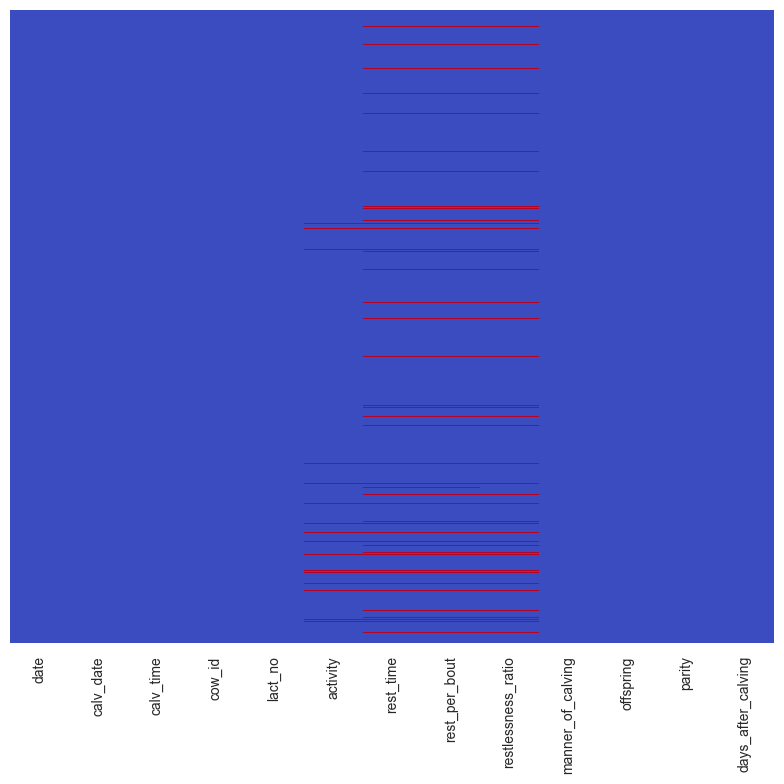

In [11]:
#Visulization of missing values thorugh heatmap 
#Setting the backgroud style for chart
sns.set_style('white')
#Setting the figure size
sns.set(rc={'figure.figsize':(8,8)})
#Generating the chart
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
#Setting the xticks for the chart
plt.xticks(fontsize=10)
plt.tight_layout()
#Show the chart
plt.show()

## Imputation of missing values through multiple imputation technique

### Libraries

In [12]:
#Loading the libraries for imputation
from fancyimpute import IterativeImputer
import missingno as msno

<AxesSubplot: >

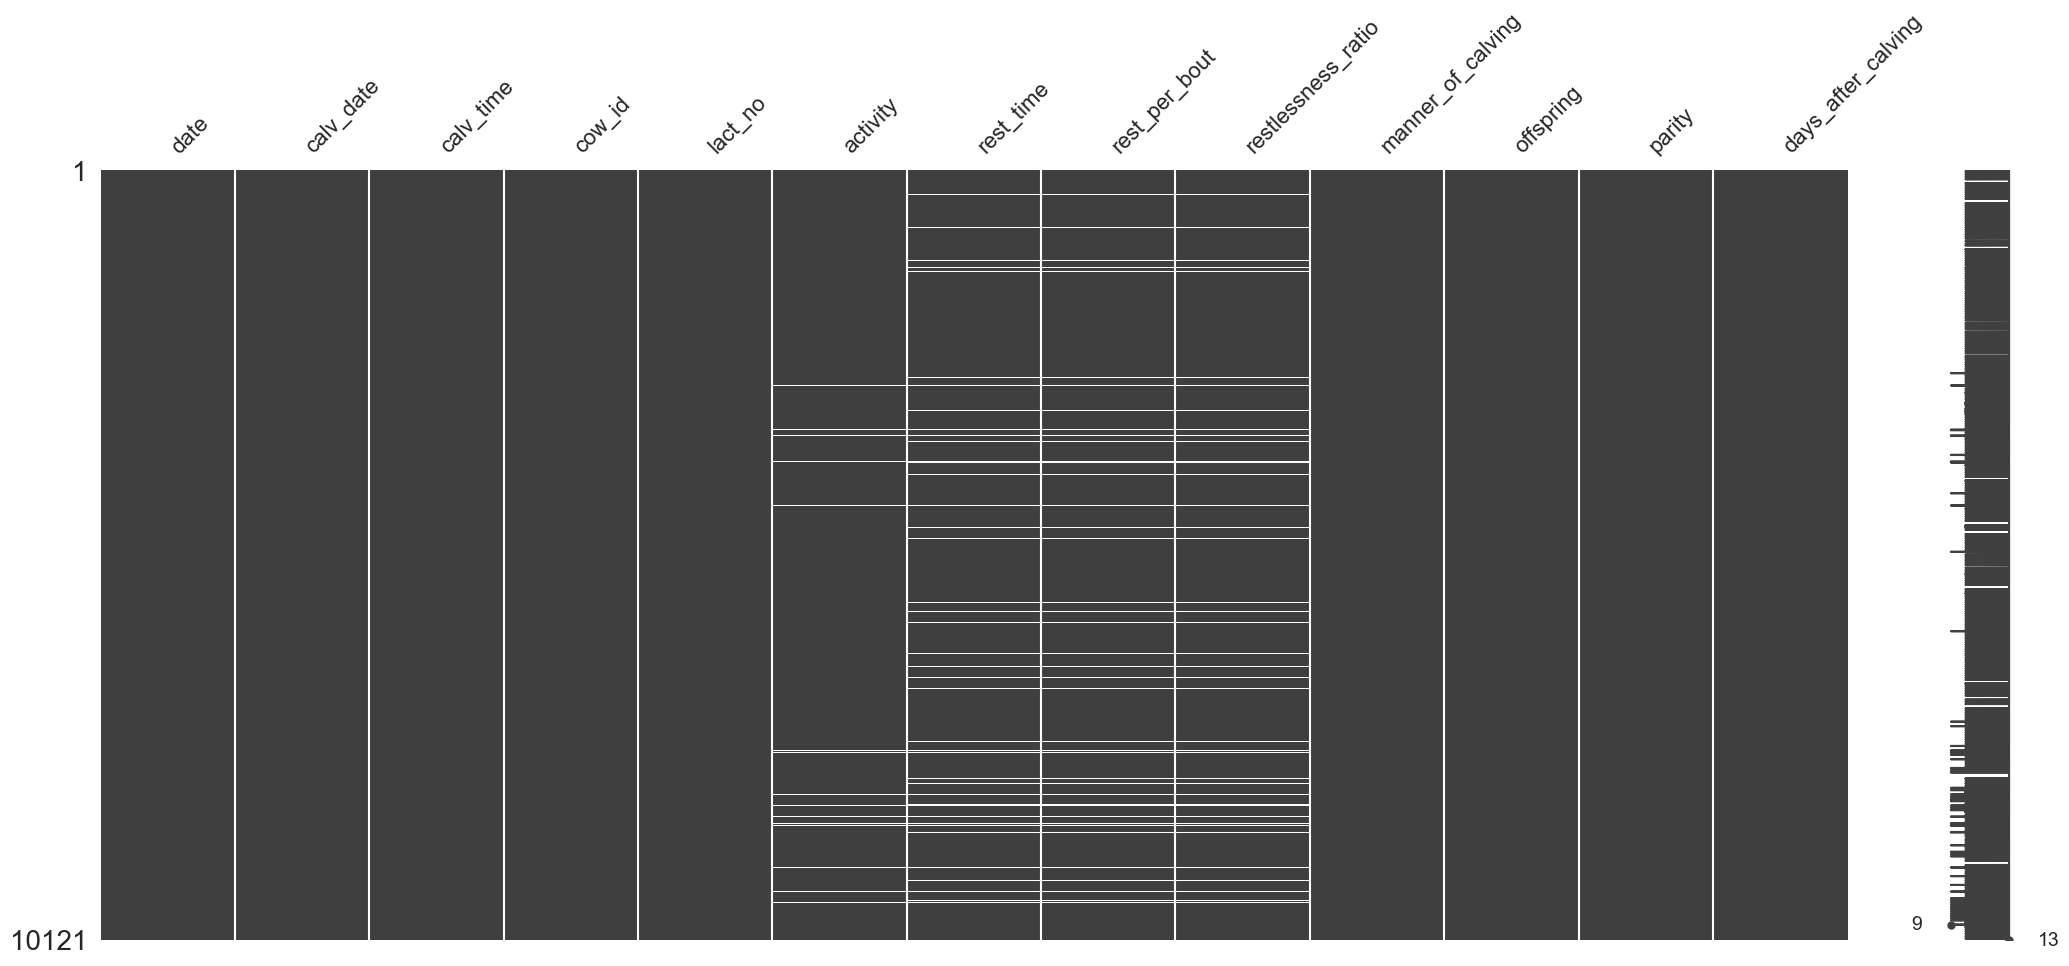

In [13]:
#printing dataset containing missing or NAN value
msno.matrix(df)

In [14]:
#Imputing the missing value through multiple imputation methods
imputer = IterativeImputer()
imputed_values = imputer.fit_transform(df[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']])
df[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']] = pd.DataFrame(imputed_values)

<AxesSubplot: >

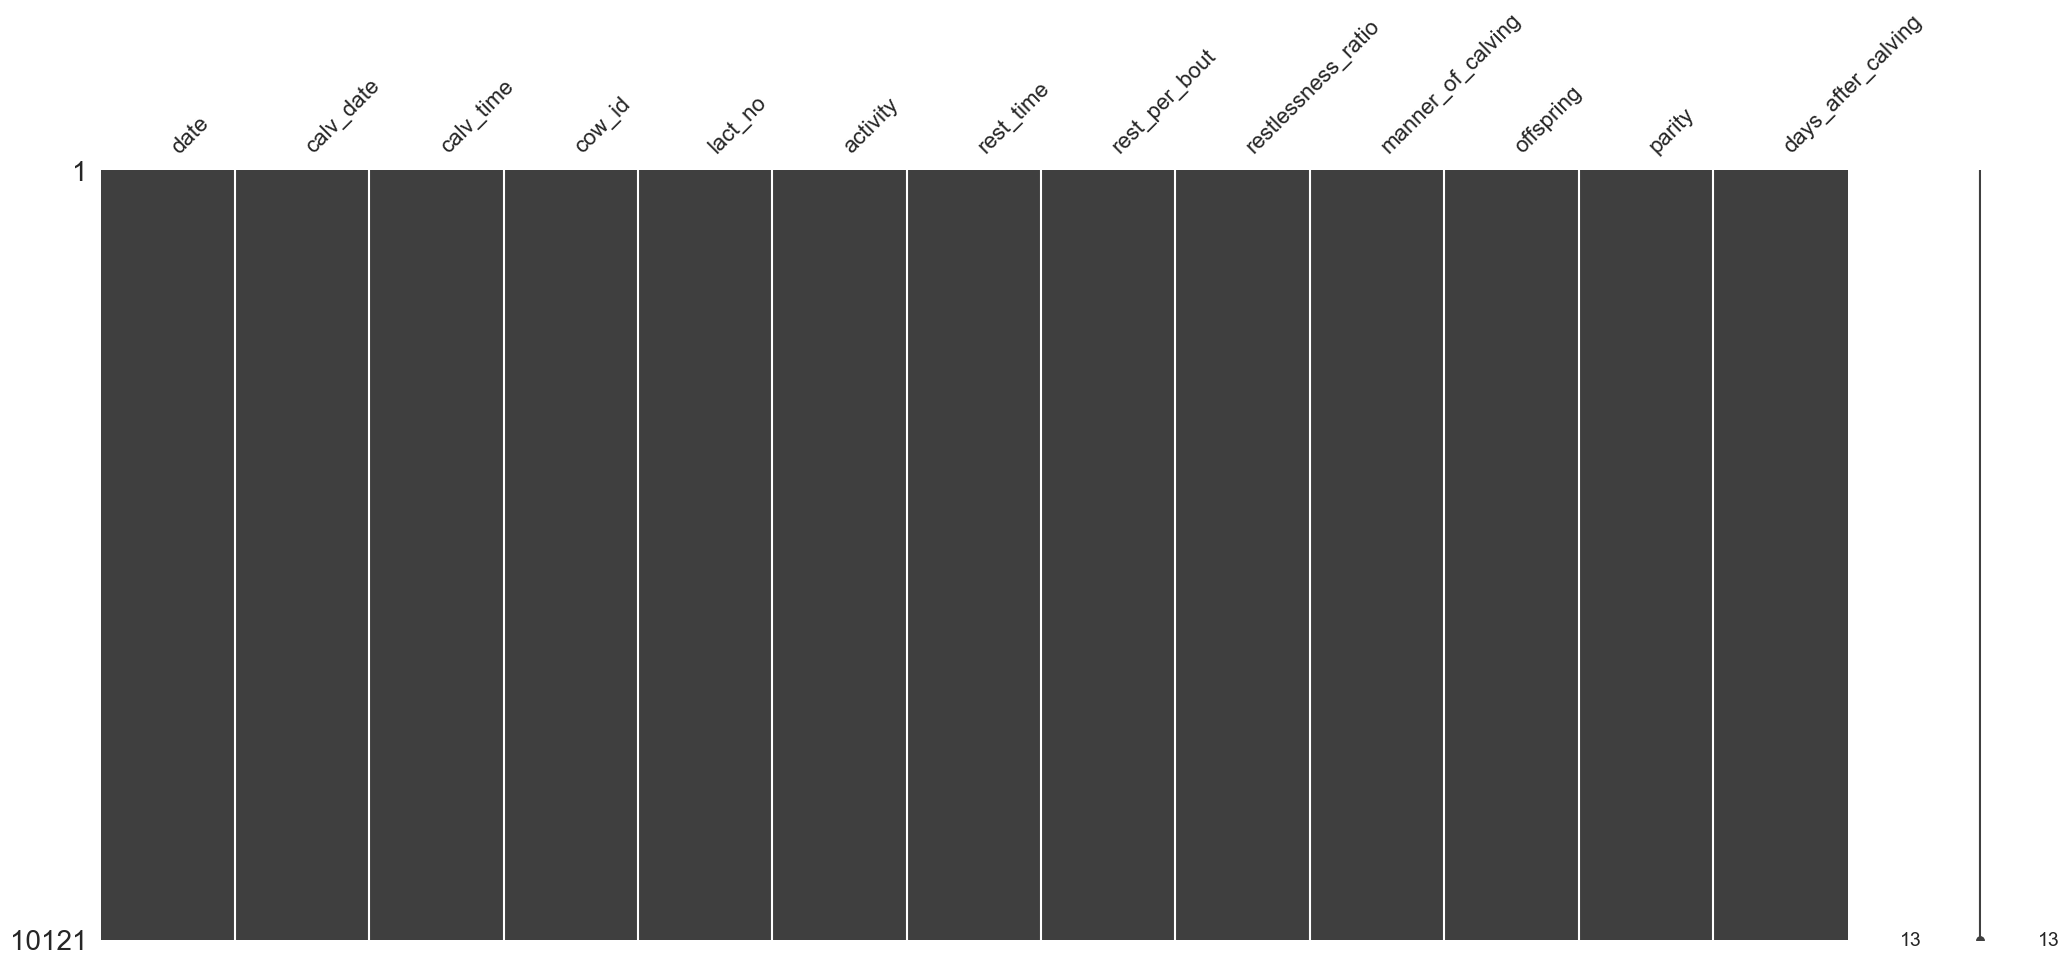

In [15]:
#Printing the dataset after multiple imputation method
msno.matrix(df)

In [16]:
#Verifying missing values after imputation
df.isnull().sum().sort_values(ascending=False)

date                  0
calv_date             0
calv_time             0
cow_id                0
lact_no               0
activity              0
rest_time             0
rest_per_bout         0
restlessness_ratio    0
manner_of_calving     0
offspring             0
parity                0
days_after_calving    0
dtype: int64

### Converting datatype into proper format

In [17]:
#Converting data types into proper format
df['cow_id'] = df['cow_id'].astype('int64')
df['lact_no'] = df['lact_no'].astype('int64')
df['activity'] = df['activity'].astype('int64')
df['rest_time'] = df['rest_time'].astype('int64')
df['rest_per_bout'] = df['rest_per_bout'].astype('int64')
df['offspring'] = df['offspring'].astype('int64')
df['days_after_calving'] = df['days_after_calving'].astype('int64')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('datetime64[ns]')
df['calv_date'] = pd.to_datetime(df['calv_date'])
df['calv_date'] = df['calv_date'].astype('datetime64[ns]')

In [18]:
#Printing the data types after conversion into proper datatypes 
df.dtypes

date                  datetime64[ns]
calv_date             datetime64[ns]
calv_time                     object
cow_id                         int64
lact_no                        int64
activity                       int64
rest_time                      int64
rest_per_bout                  int64
restlessness_ratio           float64
manner_of_calving             object
offspring                      int64
parity                        object
days_after_calving             int64
dtype: object

## Extraction of numerical & categorical features

In [19]:
#Extracting numerical features
numerical_features = [col for col in df.columns if df[col].dtypes!='O']
numerical_features

['date',
 'calv_date',
 'cow_id',
 'lact_no',
 'activity',
 'rest_time',
 'rest_per_bout',
 'restlessness_ratio',
 'offspring',
 'days_after_calving']

In [20]:
#Extracting categorical features
categorical_features = [col for col in df.columns if df[col].dtypes=='O']
categorical_features

['calv_time', 'manner_of_calving', 'parity']

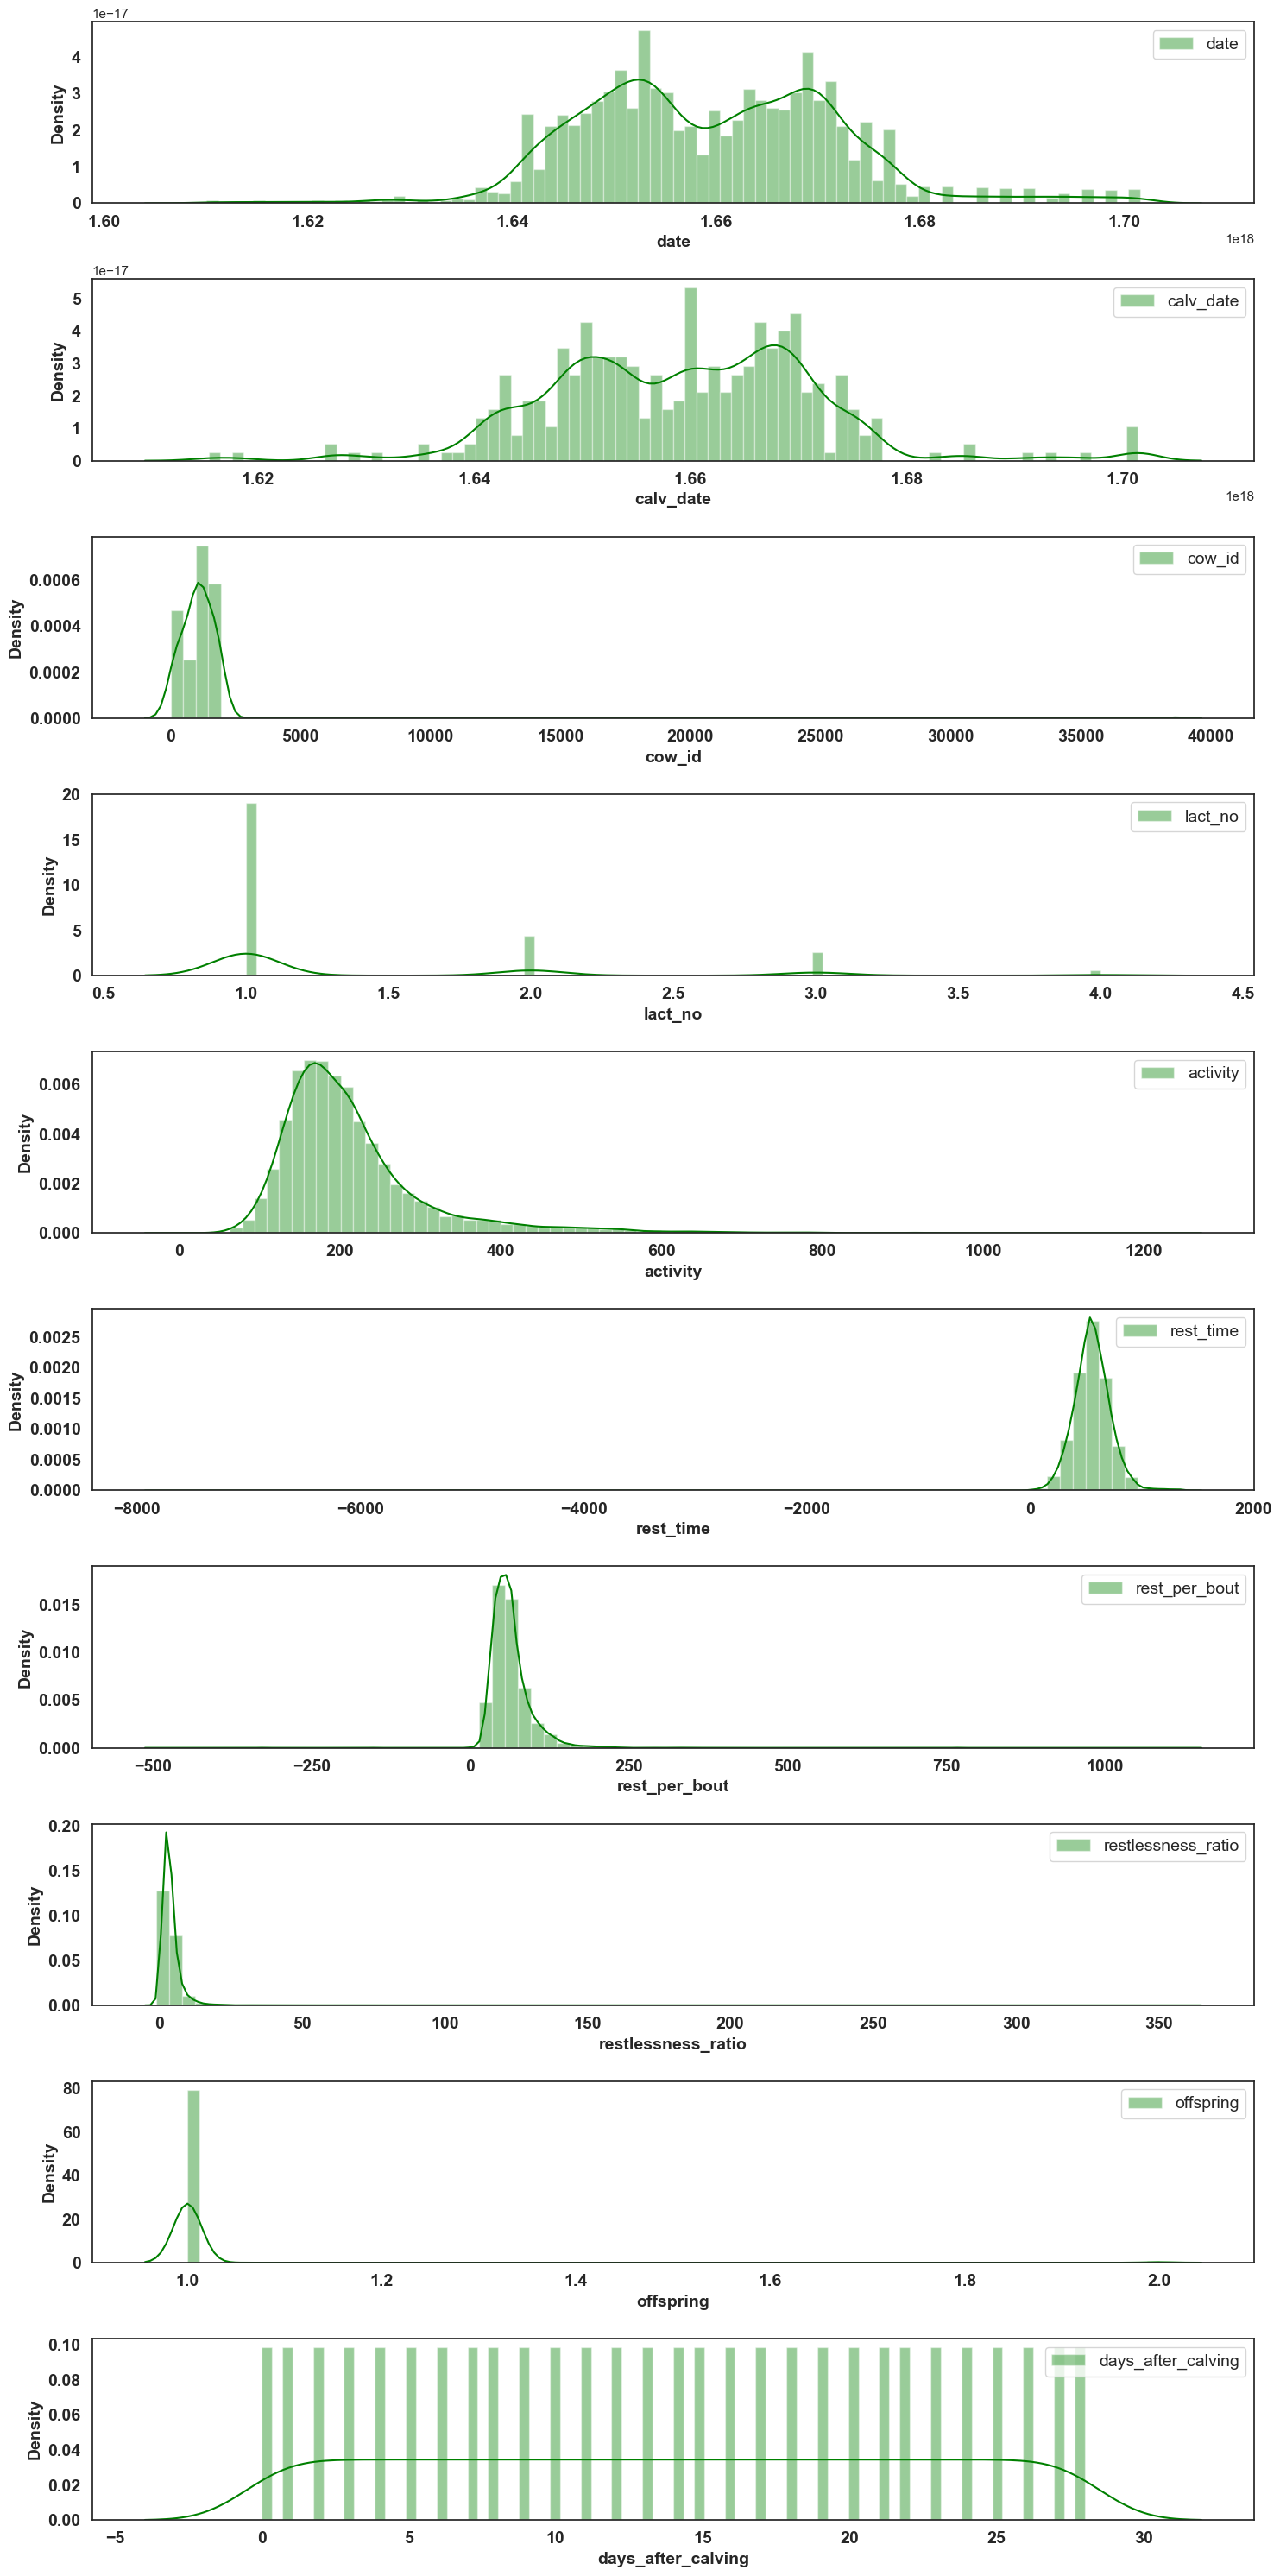

In [21]:
#Ploting numerical features 
#Setting the backgorund style for chart
sns.set_style('white')
i = 1
#Setting the figure size
fig, axe = plt.subplots(3,9, figsize=(15,30))
#Generating the distribution plot of numerical features through for loop 
for feature in numerical_features:
    plt.subplot(10,1,i)
    sns.distplot(df[feature], label=feature, color='green', kde=True, bins=80)
    #Setting label, title, ticks & legend
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.ylabel('Density', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tight_layout()
    i = i + 1
#Show the charts
plt.show()

In [22]:
#Checking the missing values in numerical features
df[numerical_features].isnull().sum().sort_values(ascending=False)

date                  0
calv_date             0
cow_id                0
lact_no               0
activity              0
rest_time             0
rest_per_bout         0
restlessness_ratio    0
offspring             0
days_after_calving    0
dtype: int64

### Verifying the cleaned numerical features through heatmap

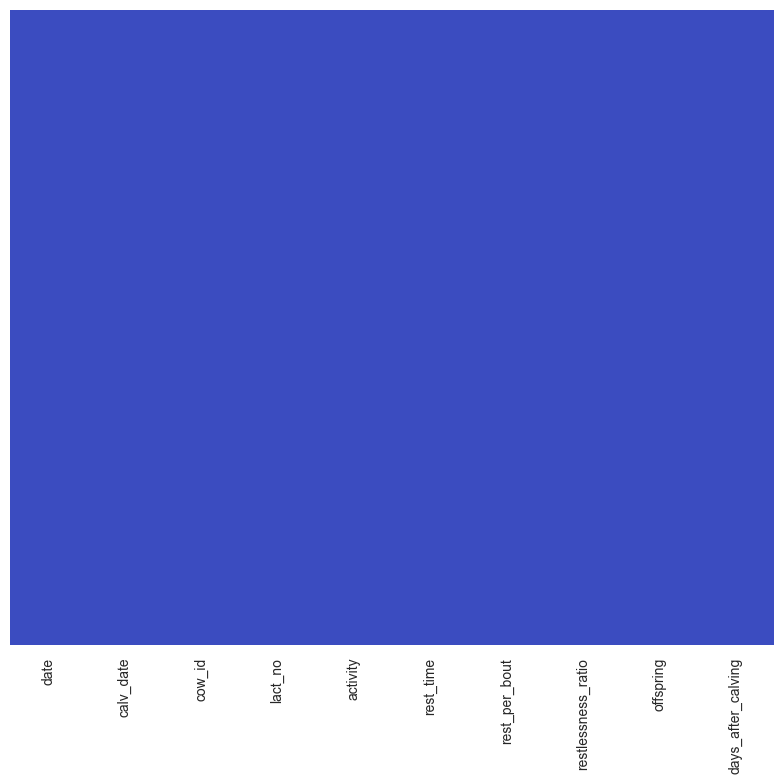

In [23]:
#Setting the figure background
sns.set_style('white')
#Setting the figure size
sns.set(rc={'figure.figsize':(8,8)})
#Generating heatmap for numerical features
sns.heatmap(df[numerical_features].isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
#Setting the xtciks for chart
plt.xticks(fontsize=10)

plt.tight_layout()
#Show the chart
plt.show()

### Scatter plot for numerical features

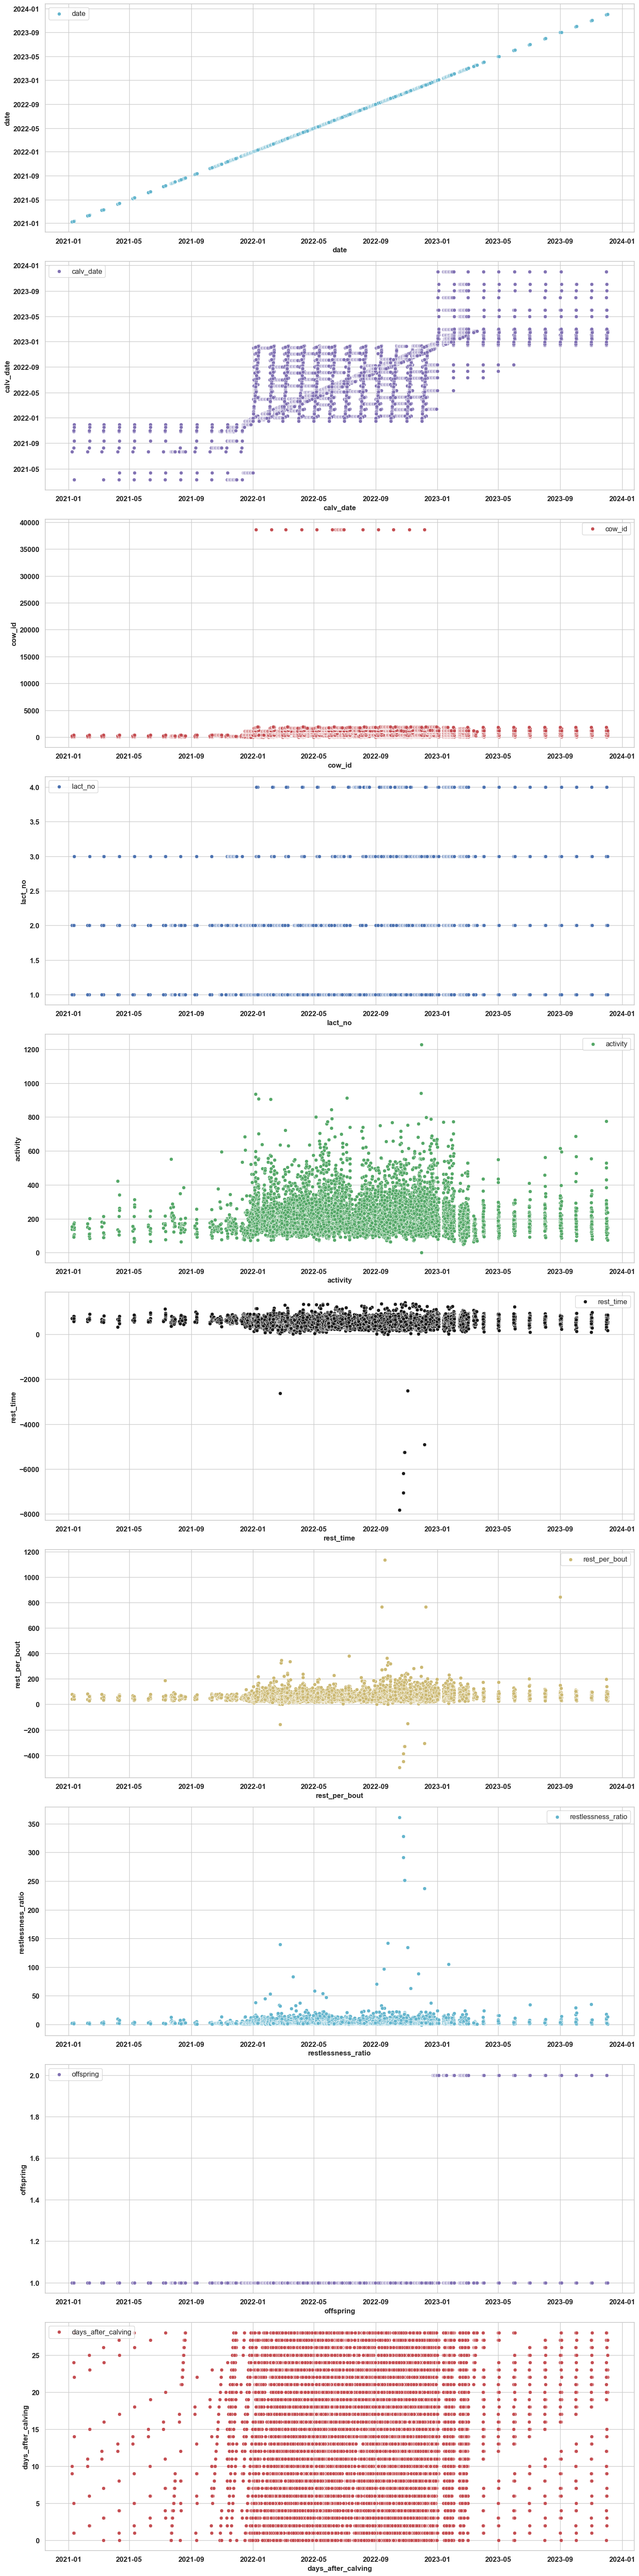

In [24]:
#Setting the background of chart
sns.set_style('whitegrid')
#Setting the colors for the charts 
colors = itertools.cycle(['c', 'm', 'r', 'b', 'g', 'k', 'y', 'c', 'm', 'r'])
i = 1
#Setting the figure size
fig, axe = plt.subplots(3, 9, figsize=(15, 60))
#Generating the scatter plot of numerical features
for feature in numerical_features:
    plt.subplot(10, 1, i)
    sns.scatterplot(x='date', y=df[feature], data=df, color=next(colors), label=feature)
    #Setting the label, ticks, & legend
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel(feature, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    i = i + 1
#Show the chart
plt.show()

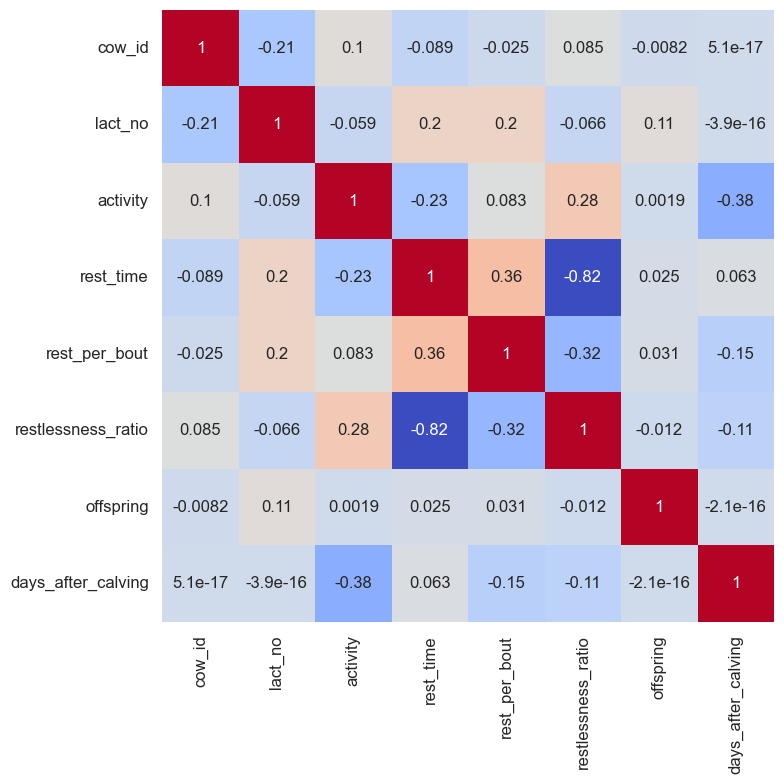

In [25]:
#Correlation chart for numerical features 
corr = df.corr()
#Setting the figure size
plt.figure(figsize=(8,8))
#Generating the chart
sns.heatmap(corr, cbar=False, cmap='coolwarm', square=True, annot=True)
#Setting the ticks for chart
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#Show the chart
plt.show()

## Descriptive statistics

## Central tendancy & dispersion

In [26]:
#Calculating the central tendancy and dispersion of activity, rest_time, rest_per_bout, and restlessness_ratio after calving

# Variable 1: Activity
mean_activity = df['activity'].mean()
median_activity = df['activity'].median()
variance_activity = df['activity'].var()
std_deviation_activity = df['activity'].std()

#Variable 2: Rest Time 
mean_rest_time = df['rest_time'].mean()
median_rest_time = df['rest_time'].median()
variance_rest_time = df['rest_time'].var()
std_deviation_rest_time = df['rest_time'].std()

#Variable 3: Rest Per Bout 
mean_rest_per_bout = df['rest_per_bout'].mean()
median_rest_per_bout = df['rest_per_bout'].median()
variance_rest_per_bout = df['rest_per_bout'].var()
std_deviation_rest_per_bout = df['rest_per_bout'].std()

#Variable 4: Restlessness ratio 
mean_restlessness_ratio = df['restlessness_ratio'].mean()
median_restlessness_ratio = df['restlessness_ratio'].median()
variance_restlessness_ratio = df['restlessness_ratio'].var()
std_deviation_restlessness_ratio = df['restlessness_ratio'].std()

#Printing the variables 
print('Activity:')
print('Mean:', mean_activity)
print('Median:', median_activity)
print('Variance:', variance_activity)
print('Standard Deviation:', std_deviation_activity)

print('Rest Time:')
print('Mean:', mean_rest_time)
print('Median:', median_rest_time)
print('Variance:', variance_rest_time)
print('Standard Deviation:', std_deviation_rest_time)

print('Rest Per Bout:')
print('Mean:', mean_rest_per_bout)
print('Median:', median_rest_per_bout)
print('Variance:', variance_rest_per_bout)
print('Standard Deviation:', std_deviation_rest_per_bout)

print('Restlessness Ratio:')
print('Mean:', mean_restlessness_ratio)
print('Median:', median_restlessness_ratio)
print('Variance:', variance_restlessness_ratio)
print('Standard Deviation:', std_deviation_restlessness_ratio)

Activity:
Mean: 213.88311431676712
Median: 192.0
Variance: 8740.15461701944
Standard Deviation: 93.48879407190704
Rest Time:
Mean: 552.2190495010375
Median: 552.0
Variance: 54230.93373194231
Standard Deviation: 232.875360937868
Rest Per Bout:
Mean: 62.88301551230116
Median: 58.0
Variance: 1270.6614120915576
Standard Deviation: 35.64633798991921
Restlessness Ratio:
Mean: 4.132876326296996
Median: 3.1
Variance: 67.04454325464329
Standard Deviation: 8.188073232125083


# Summary Statistics

In [27]:
#Creating a statistics summary table 
data = {'Variables': ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio'], 
        'Mean': [mean_activity, mean_rest_time, mean_rest_per_bout, mean_restlessness_ratio], 
        'Median': [median_activity, median_rest_time, median_rest_per_bout, median_restlessness_ratio],
        'Variance': [variance_activity, variance_rest_time, variance_rest_per_bout, variance_restlessness_ratio], 
        'Standard Deviation': [std_deviation_activity, std_deviation_rest_time, std_deviation_rest_per_bout, 
                               std_deviation_restlessness_ratio]
    
}
#creating a dataframe to store the data
df_statistics = pd.DataFrame(data)

#printing the statistics dataframe
print(df_statistics)

            Variables        Mean  Median      Variance  Standard Deviation
0            Activity  213.883114   192.0   8740.154617           93.488794
1           Rest Time  552.219050   552.0  54230.933732          232.875361
2       Rest Per Bout   62.883016    58.0   1270.661412           35.646338
3  Restlessness Ratio    4.132876     3.1     67.044543            8.188073


## Distribution plot (whole dataset)

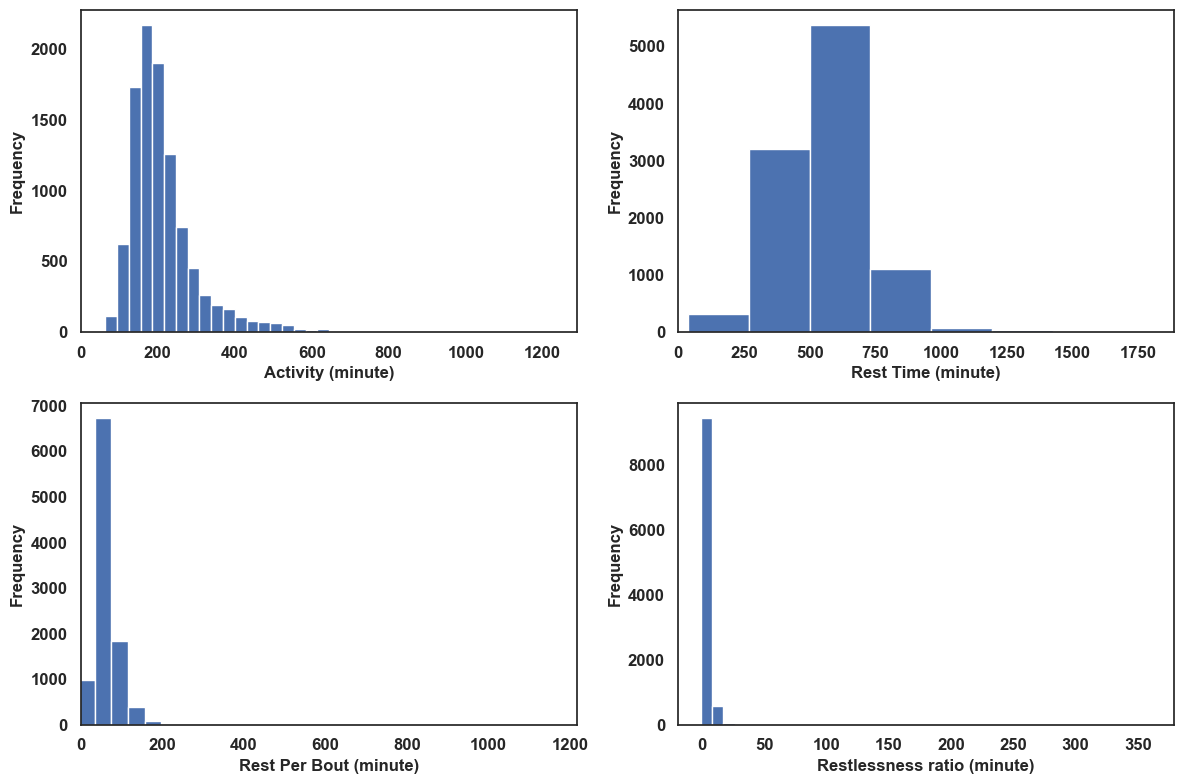

In [28]:
# Settting the background for chat
sns.set_style('white')

# Setting the figure size
plt.figure(figsize=(12, 8))

# Plot 1: Activity
plt.subplot(2, 2, 1)
plt.hist(df['activity'], bins=40)
#Setting the label, & ticks 
plt.xlabel('Activity (minute)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlim(0)

# Plot 2: Rest Time
plt.subplot(2, 2, 2)
plt.hist(df['rest_time'], bins=40)
#Setting the label, & ticks
plt.xlabel('Rest Time (minute)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold') 
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlim(0)

# Plot 3: Rest Per Bout
plt.subplot(2, 2, 3)
plt.hist(df['rest_per_bout'], bins=40)
#Setting the label, & ticks
plt.xlabel('Rest Per Bout (minute)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlim(0)

# Plot 4: Restlessness Ratio
plt.subplot(2, 2, 4)
plt.hist(df['restlessness_ratio'], bins=40)
#Setting the label, & ticks
plt.xlabel('Restlessness ratio (minute)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')


plt.tight_layout()

# Show the chart
#plt.show()
#Saving the charts 
plt.savefig('after_calving_distribution_plot_whole_dataset.jpg', dpi=300)

## Distribution plot for single animal

In [29]:
#Filtering specific animal id
animal_id = 3
#Filtering the data for specific animal 
animal_data = df[df['cow_id'] == animal_id]
#printing the filtered datafram
print(animal_data)

         date  calv_date calv_time  cow_id  lact_no  activity  rest_time  \
0  2021-12-24 2021-12-24      8:04       3        2       204        557   
1  2021-12-25 2021-12-24      8:04       3        2       240        453   
2  2021-12-26 2021-12-24      8:04       3        2       304        481   
3  2021-12-27 2021-12-24      8:04       3        2       155        547   
4  2021-12-28 2021-12-24      8:04       3        2       178        528   
5  2021-12-29 2021-12-24      8:04       3        2       147        565   
6  2021-12-30 2021-12-24      8:04       3        2       118        757   
7  2021-12-31 2021-12-24      8:04       3        2       132        724   
8  2022-01-01 2021-12-24      8:04       3        2       168        730   
9  2022-02-01 2021-12-24      8:04       3        2       171        616   
10 2022-03-01 2021-12-24      8:04       3        2       159        514   
11 2022-04-01 2021-12-24      8:04       3        2       163        408   
12 2022-05-0

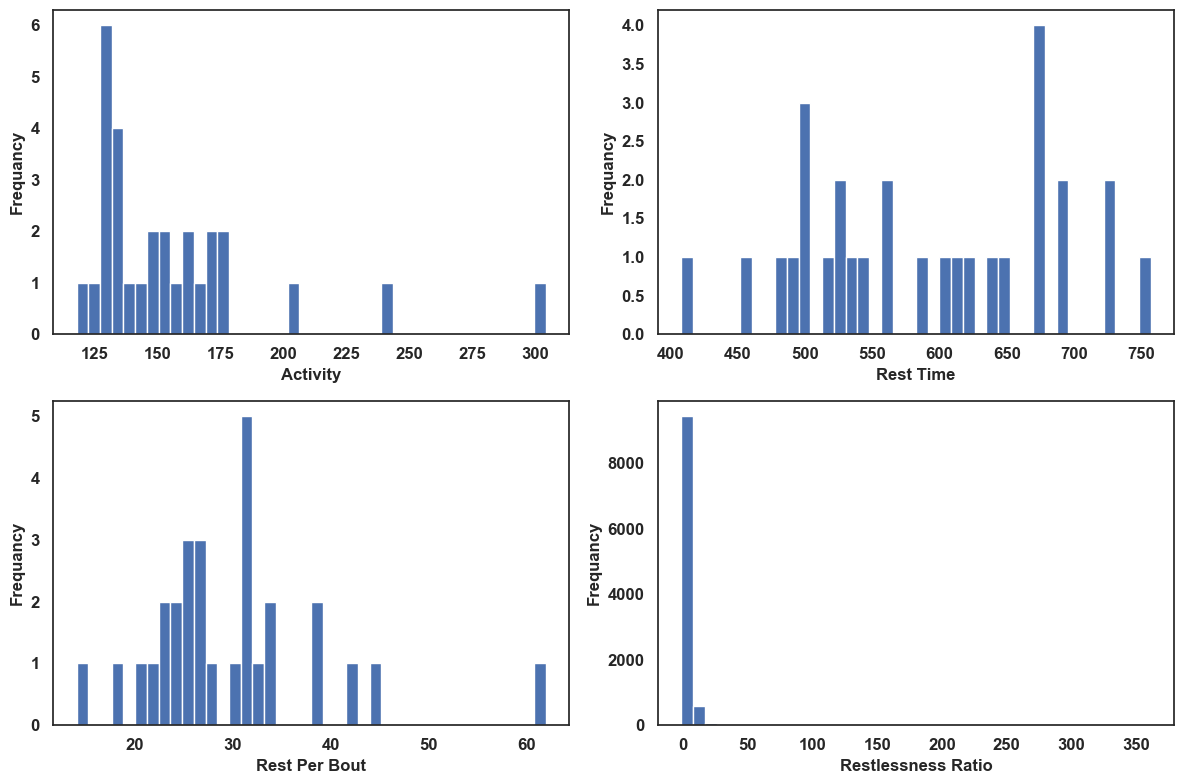

In [30]:
#Setting the background for chart 
sns.set_style('white')
#setting the figure size
plt.figure(figsize=(12,8))
#Plot 1: Activity
plt.subplot(2,2,1)
plt.hist(animal_data['activity'], bins=40)
#Setting the label, & ticks 
plt.xlabel('Activity', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 2: Rest Time 
plt.subplot(2,2,2)
plt.hist(animal_data['rest_time'], bins=40)
#Setting the label, & ticks 
plt.xlabel('Rest Time', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 3: Rest Per Bout
plt.subplot(2,2,3)
plt.hist(animal_data['rest_per_bout'], bins=40)
#Setting the label, & ticks 
plt.xlabel('Rest Per Bout', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 4: Restlessness Ratio 
plt.subplot(2,2,4)
plt.hist(df['restlessness_ratio'], bins=40)
#Setting the label, & ticks 
plt.xlabel('Restlessness Ratio', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()

#Show the chart
#plt.show()
#Save the chart
plt.savefig('after_calving_distribution_plot_single_animal.jpg', dpi=300)

## KDE Kernel Density Plot (for single animal)

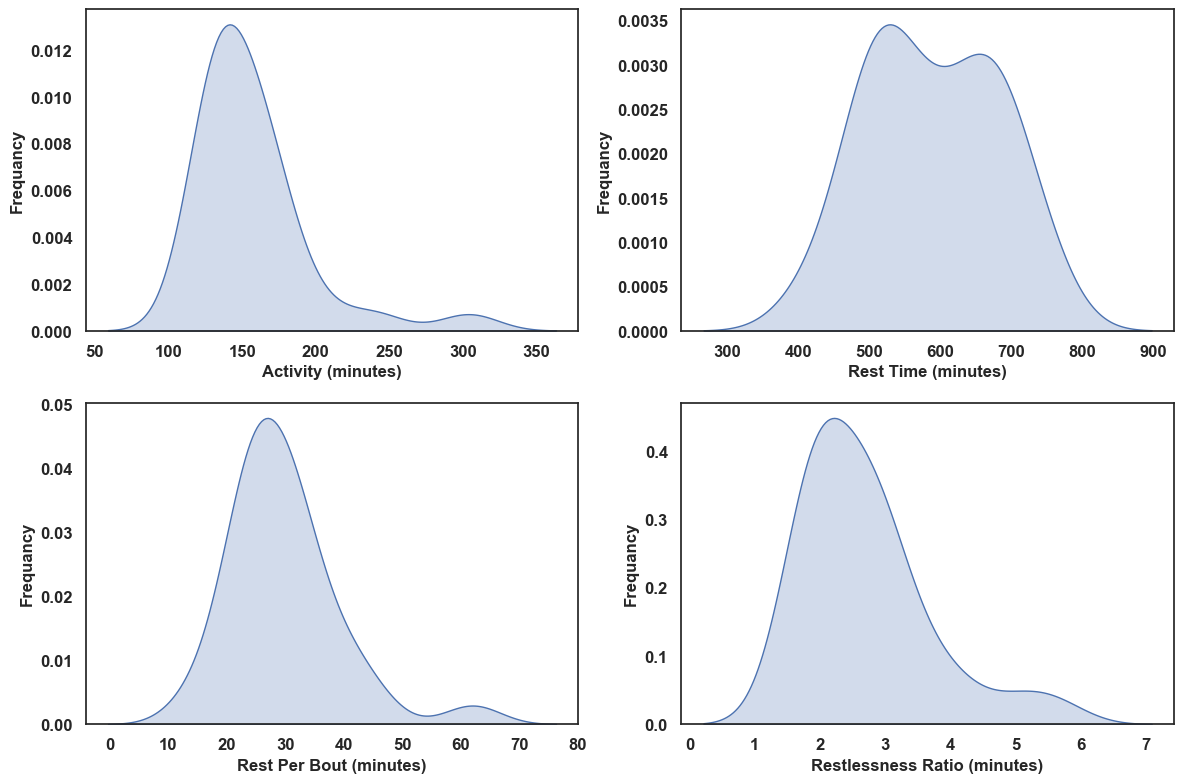

In [31]:
#Setting the background for chart 
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(12,8))
#Plot 1: Activity
plt.subplot(2,2,1)
sns.kdeplot(animal_data['activity'], shade=True)
#Setting the label, & ticks 
plt.xlabel('Activity (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 2: Rest Time 
plt.subplot(2,2,2)
sns.kdeplot(animal_data['rest_time'], shade=True)
#Setting the label, & ticks 
plt.xlabel('Rest Time (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 3: Rest Per Bout 
plt.subplot(2,2,3)
sns.kdeplot(animal_data['rest_per_bout'], shade=True)
#Setting the label, & ticks 
plt.xlabel('Rest Per Bout (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 4: Restlessness Ratio
plt.subplot(2,2,4)
sns.kdeplot(animal_data['restlessness_ratio'], shade=True)
#Setting the label, & ticks 
plt.xlabel('Restlessness Ratio (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequancy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()

#Show the plot 
#plt.show()
#Save the chart
plt.savefig('KDE_plot_after_calving_single_animal.jpg', dpi=300)

## One Way ANOVA (Whole Dataset)

### Libraries

In [32]:
#Importing libraries
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Encoding categorical libraries

In [33]:
#Encoding categorical variables 
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['manner_of_calving'] = label_encoder.fit_transform(df['manner_of_calving'])
df_encoded['parity'] = label_encoder.fit_transform(df['parity'])

# One-way ANOVA

In [34]:
#Creating one way ANOVA for whole dataset
results_activity_parity = stats.f_oneway(df_encoded['activity'], df_encoded['parity'])
results_activity_manner_of_calving = stats.f_oneway(df_encoded['activity'], df_encoded['parity'])

results_rest_time_parity = stats.f_oneway(df_encoded['rest_time'], df_encoded['parity'])
results_rest_time_manner_of_calving = stats.f_oneway(df_encoded['rest_time'], df_encoded['manner_of_calving'])

results_rest_per_bout_parity = stats.f_oneway(df_encoded['rest_per_bout'], df_encoded['manner_of_calving'])
results_rest_per_bout_manner_of_calving = stats.f_oneway(df_encoded['rest_per_bout'], df_encoded['manner_of_calving'])

results_restlessness_ratio_parity = stats.f_oneway(df_encoded['restlessness_ratio'], df_encoded['parity'])
results_restlessness_ratio_manner_of_calving = stats.f_oneway(df_encoded['restlessness_ratio'], df_encoded['manner_of_calving'])

# Printing Results

In [35]:
#Printing the results 
print('ANOVA for whole Dataset:')
print('Activity Parity: F-Statistics:', results_activity_parity.statistic)
print('Activity Parity: p-value:', results_activity_parity.pvalue)
print('Activity Manner of Calving: F-Statistics:', results_activity_manner_of_calving.statistic)
print('Activity Manner of Calving: p-value:', results_activity_manner_of_calving.pvalue)

print('Rest Time Parity: F-Statistics:', results_rest_time_parity.statistic)
print('Rest Time Parity: p-value:', results_rest_time_parity.pvalue)
print('Rest Time Manner of Calving: F-Statistics:', results_rest_time_manner_of_calving.statistic)
print('Rest Time Manner of Calving: p-value:', results_rest_time_manner_of_calving.pvalue)

print('Rest Per Bout Parity: F-Statistics:', results_rest_per_bout_parity.statistic)
print('Rest Per Bout: p-value:', results_rest_per_bout_parity.pvalue)
print('Rest Per Bout Manner of Calving: F-Statistics:', results_rest_per_bout_manner_of_calving.statistic)
print('Rest Per Bout Manner of Calving: p-value:', results_rest_per_bout_manner_of_calving.pvalue)

print('Restlessness Ratio Parity: F-Statistics:', results_restlessness_ratio_parity.statistic)
print('Rest Per Bout: p-value:', results_restlessness_ratio_parity.pvalue)
print('Rest Per Bout Manner of Calving: F-Statistics:', results_restlessness_ratio_manner_of_calving.statistic)
print('Rest Per Bout Manner of Calving: p-value:', results_restlessness_ratio_manner_of_calving.pvalue)

ANOVA for whole Dataset:
Activity Parity: F-Statistics: 52613.64996694063
Activity Parity: p-value: 0.0
Activity Manner of Calving: F-Statistics: 52613.64996694063
Activity Manner of Calving: p-value: 0.0
Rest Time Parity: F-Statistics: 56761.84720466151
Rest Time Parity: p-value: 0.0
Rest Time Manner of Calving: F-Statistics: 56911.37926719597
Rest Time Manner of Calving: p-value: 0.0
Rest Per Bout Parity: F-Statistics: 31496.355464007516
Rest Per Bout: p-value: 0.0
Rest Per Bout Manner of Calving: F-Statistics: 31496.355464007516
Rest Per Bout Manner of Calving: p-value: 0.0
Restlessness Ratio Parity: F-Statistics: 1748.05859683371
Rest Per Bout: p-value: 0.0
Rest Per Bout Manner of Calving: F-Statistics: 2578.486176007073
Rest Per Bout Manner of Calving: p-value: 0.0


## one way ANOVA (Single Animal)

### Libraries

In [36]:
#Libraries
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Data filteration for single animal

In [37]:
#Filtering single animal id 
animal_id = 3
#Filtering dataframe for single animal
animal_data = df[df['cow_id'] == animal_id]

### Encoding categorical variables

In [38]:
#Encoding the categorical variable
label_encoder = LabelEncoder()
animal_data_encoded = animal_data.copy()
animal_data_encoded['manner_of_calving'] = label_encoder.fit_transform(animal_data['manner_of_calving'])
animal_data_encoded['parity'] = label_encoder.fit_transform(animal_data['parity'])

# One way ANOVA

In [39]:
#Creating one way ANOVA for single animal 
results_activity_parity = stats.f_oneway(animal_data_encoded['activity'], animal_data_encoded['parity'])
results_activity_manner_of_calving = stats.f_oneway(animal_data_encoded['activity'], animal_data_encoded['parity'])

results_rest_time_parity = stats.f_oneway(animal_data_encoded['rest_time'], animal_data_encoded['parity'])
results_rest_time_manner_of_calving = stats.f_oneway(animal_data_encoded['rest_time'], animal_data_encoded['manner_of_calving'])

results_rest_per_bout_parity = stats.f_oneway(animal_data_encoded['rest_per_bout'], animal_data_encoded['manner_of_calving'])
results_rest_per_bout_manner_of_calving = stats.f_oneway(animal_data_encoded['rest_per_bout'], animal_data_encoded['manner_of_calving'])

results_restlessness_ratio_parity = stats.f_oneway(animal_data_encoded['restlessness_ratio'], animal_data_encoded['parity'])
results_restlessness_ratio_manner_of_calving = stats.f_oneway(animal_data_encoded['restlessness_ratio'], animal_data_encoded['manner_of_calving'])

# Printing Result

In [40]:
#Printing the results
print('ANOVA for Animal ID 3:')
print('Activity Parity: F-Statistics:', results_activity_parity.statistic)
print('Activity Parity: p-value:', results_activity_parity.pvalue)
print('Activity Manner of Calving: F-Statistics:', results_activity_manner_of_calving.statistic)
print('Activity Manner of Calving: p-value:', results_activity_manner_of_calving.pvalue)

print('Rest Time Parity: F-Statistics:', results_rest_time_parity.statistic)
print('Rest Time Parity: p-value:', results_rest_time_parity.pvalue)
print('Rest Time Manner of Calving: F-Statistics:', results_rest_time_manner_of_calving.statistic)
print('Rest Time Manner of Calving: p-value:', results_rest_time_manner_of_calving.pvalue)

print('Rest Per Bout Parity: F-Statistics:', results_rest_per_bout_parity.statistic)
print('Rest Per Bout: p-value:', results_rest_per_bout_parity.pvalue)
print('Rest Per Bout Manner of Calving: F-Statistics:', results_rest_per_bout_manner_of_calving.statistic)
print('Rest Per Bout Manner of Calving: p-value:', results_rest_per_bout_manner_of_calving.pvalue)

print('Restlessness Ratio Parity: F-Statistics:', results_restlessness_ratio_parity.statistic)
print('Rest Per Bout: p-value:', results_restlessness_ratio_parity.pvalue)
print('Rest Per Bout Manner of Calving: F-Statistics:', results_restlessness_ratio_manner_of_calving.statistic)
print('Rest Per Bout Manner of Calving: p-value:', results_restlessness_ratio_manner_of_calving.pvalue)

ANOVA for Animal ID 3:
Activity Parity: F-Statistics: 476.05957996470823
Activity Parity: p-value: 4.6941560695229737e-29
Activity Manner of Calving: F-Statistics: 476.05957996470823
Activity Manner of Calving: p-value: 4.6941560695229737e-29
Rest Time Parity: F-Statistics: 1183.172337436849
Rest Time Parity: p-value: 2.3832651112637077e-39
Rest Time Manner of Calving: F-Statistics: 1183.172337436849
Rest Time Manner of Calving: p-value: 2.3832651112637077e-39
Rest Per Bout Parity: F-Statistics: 295.99135012092785
Rest Per Bout: p-value: 5.1108965901492446e-24
Rest Per Bout Manner of Calving: F-Statistics: 295.99135012092785
Rest Per Bout Manner of Calving: p-value: 5.1108965901492446e-24
Restlessness Ratio Parity: F-Statistics: 224.41105181029997
Rest Per Bout: p-value: 3.04392809309433e-21
Rest Per Bout Manner of Calving: F-Statistics: 224.41105181029997
Rest Per Bout Manner of Calving: p-value: 3.04392809309433e-21


# Summary statistics of numerical variables

### Library

In [41]:
#Importing library
import scipy.stats as stats

### Grouping the data for summary statistics

In [42]:
#Grouping data with categorical variables and calculating the summary statistics 
summary_stats = df.groupby(['manner_of_calving', 'parity']).agg({
    'activity': [np.mean, np.std, stats.sem],
    'rest_time': [np.mean, np.std, stats.sem],
    'rest_per_bout': [np.mean, np.std, stats.sem],
    'restlessness_ratio': [np.mean, np.std, stats.sem]
})

In [43]:
#Creating a dictionary to store summary statistics
summary_dict = {}

for (manner, parity), values in summary_stats.iterrows():
    if manner not in summary_dict:
        summary_dict[manner] = {}
    summary_dict[manner][parity] = {
        'Activity': {
            'Mean': values['activity']['mean'],
            'Std': values['activity']['std'],
            'Std Err': values['activity']['sem']
        },
        'Rest Time': {
            'Mean': values['rest_time']['mean'],
            'Std': values['rest_time']['std'],
            'Std Err': values['rest_time']['sem']
        },
        'Rest Per Bout': {
            'Mean': values['rest_per_bout']['mean'],
            'Std': values['rest_per_bout']['std'],
            'Std Err': values['rest_per_bout']['sem']
        },
        'Restlessness Ratio': {
            'Mean': values['restlessness_ratio']['mean'],
            'Std': values['restlessness_ratio']['std'],
            'Std Err': values['restlessness_ratio']['sem']
        }
    }

# Printing Result

In [44]:
#Printing the summary statistics 
for manner, data in summary_dict.items():
    print(f"Manner of Calving: {manner}")
    for parity, stats in data.items():
        print(f"  Parity: {parity}")
        for variable, values in stats.items():
            print(f"    {variable}:")
            print(f"      Mean: {values['Mean']}")
            print(f"      Standard Deviation: {values['Std']}")
            print(f"      Standard Error: {values['Std Err']}")

Manner of Calving: Normal
  Parity: multiparous
    Activity:
      Mean: 202.0028735632184
      Standard Deviation: 92.39487811745704
      Standard Error: 1.751109408438885
    Rest Time:
      Mean: 634.6307471264367
      Standard Deviation: 159.41894853727234
      Standard Error: 3.021379824887797
    Rest Per Bout:
      Mean: 73.42097701149426
      Standard Deviation: 39.86951685230364
      Standard Error: 0.7556250681041874
    Restlessness Ratio:
      Mean: 3.0884416520428206
      Standard Deviation: 3.3934677416215506
      Standard Error: 0.06431453139678545
  Parity: primiparous
    Activity:
      Mean: 218.39103175684886
      Standard Deviation: 93.5125627424523
      Standard Error: 1.0917185748765186
    Rest Time:
      Mean: 520.9482077143247
      Standard Deviation: 248.22326997197402
      Standard Error: 2.897898919649333
    Rest Per Bout:
      Mean: 58.884421425650814
      Standard Deviation: 33.04112467870816
      Standard Error: 0.38574078699889
    

## Calculating correlation between numerical variables (Whole Dataset)

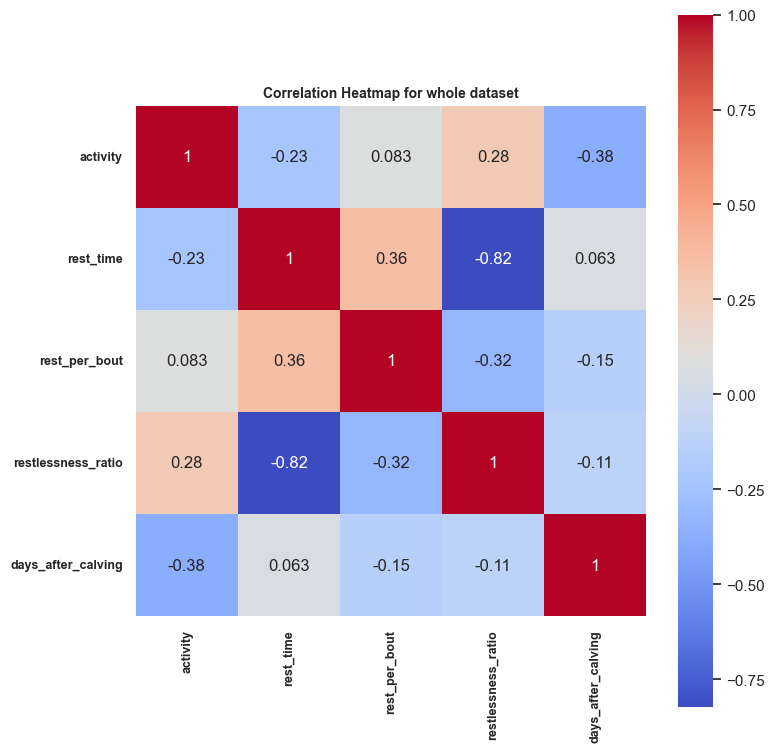

In [45]:
#Filtering the numerical variables
variables_of_interest = ['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio', 'days_after_calving']
#Subestting the dataframe 
subset_df = df[variables_of_interest]
#Calculating the correlation matrix 
corr_matrix = subset_df.corr()
#Setting the background for chart 
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(8,8))
#Creating correlation matrix through heatmap
sns.heatmap(corr_matrix, cbar=True, cmap='coolwarm', annot=True, square=True)
#Setting the title, & ticks 
plt.title('Correlation Heatmap for whole dataset', fontsize=10, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.tight_layout()

#Show the chart 
plt.show()

## Calculating correlation between numerical variables 

### Filtering the data for single animal

In [46]:
#Filtering the specific animal id 
animal_id = 3
#Filtering the dataframe for specific animal 
animal_data = df[df['cow_id'] == animal_id]

### Selecting the variables

In [47]:
#Selecting numerical variabls 
variables_of_interest = ['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio', 'days_after_calving']
#Subsetting the dataframe 
subset_df = animal_data[variables_of_interest]

# Correlation Chart

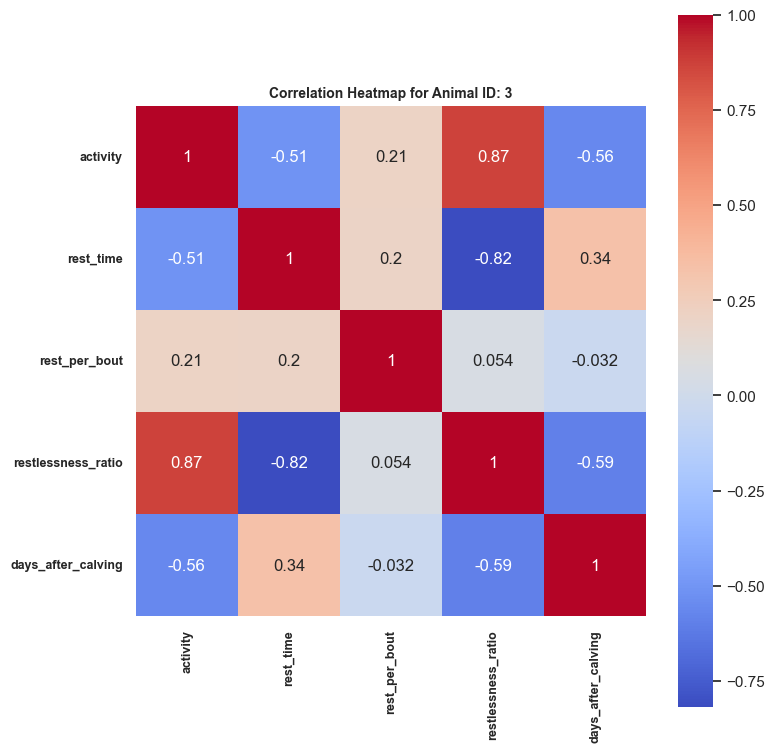

In [48]:
#Creating correaltion matrix 
corr_matrix = subset_df.corr()
#Setting background for chart 
sns.set_style('white')
#Setting the chart figure size
plt.figure(figsize=(8,8))
#Creating the chart 
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, cmap='coolwarm')
#Setting the title, title, & label
plt.title(f'Correlation Heatmap for Animal ID: {animal_id}', fontsize=10, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.tight_layout()

#Show the chart
plt.show()

# Comparing activity, rest time, rest per bout, restlessness ratio with parity

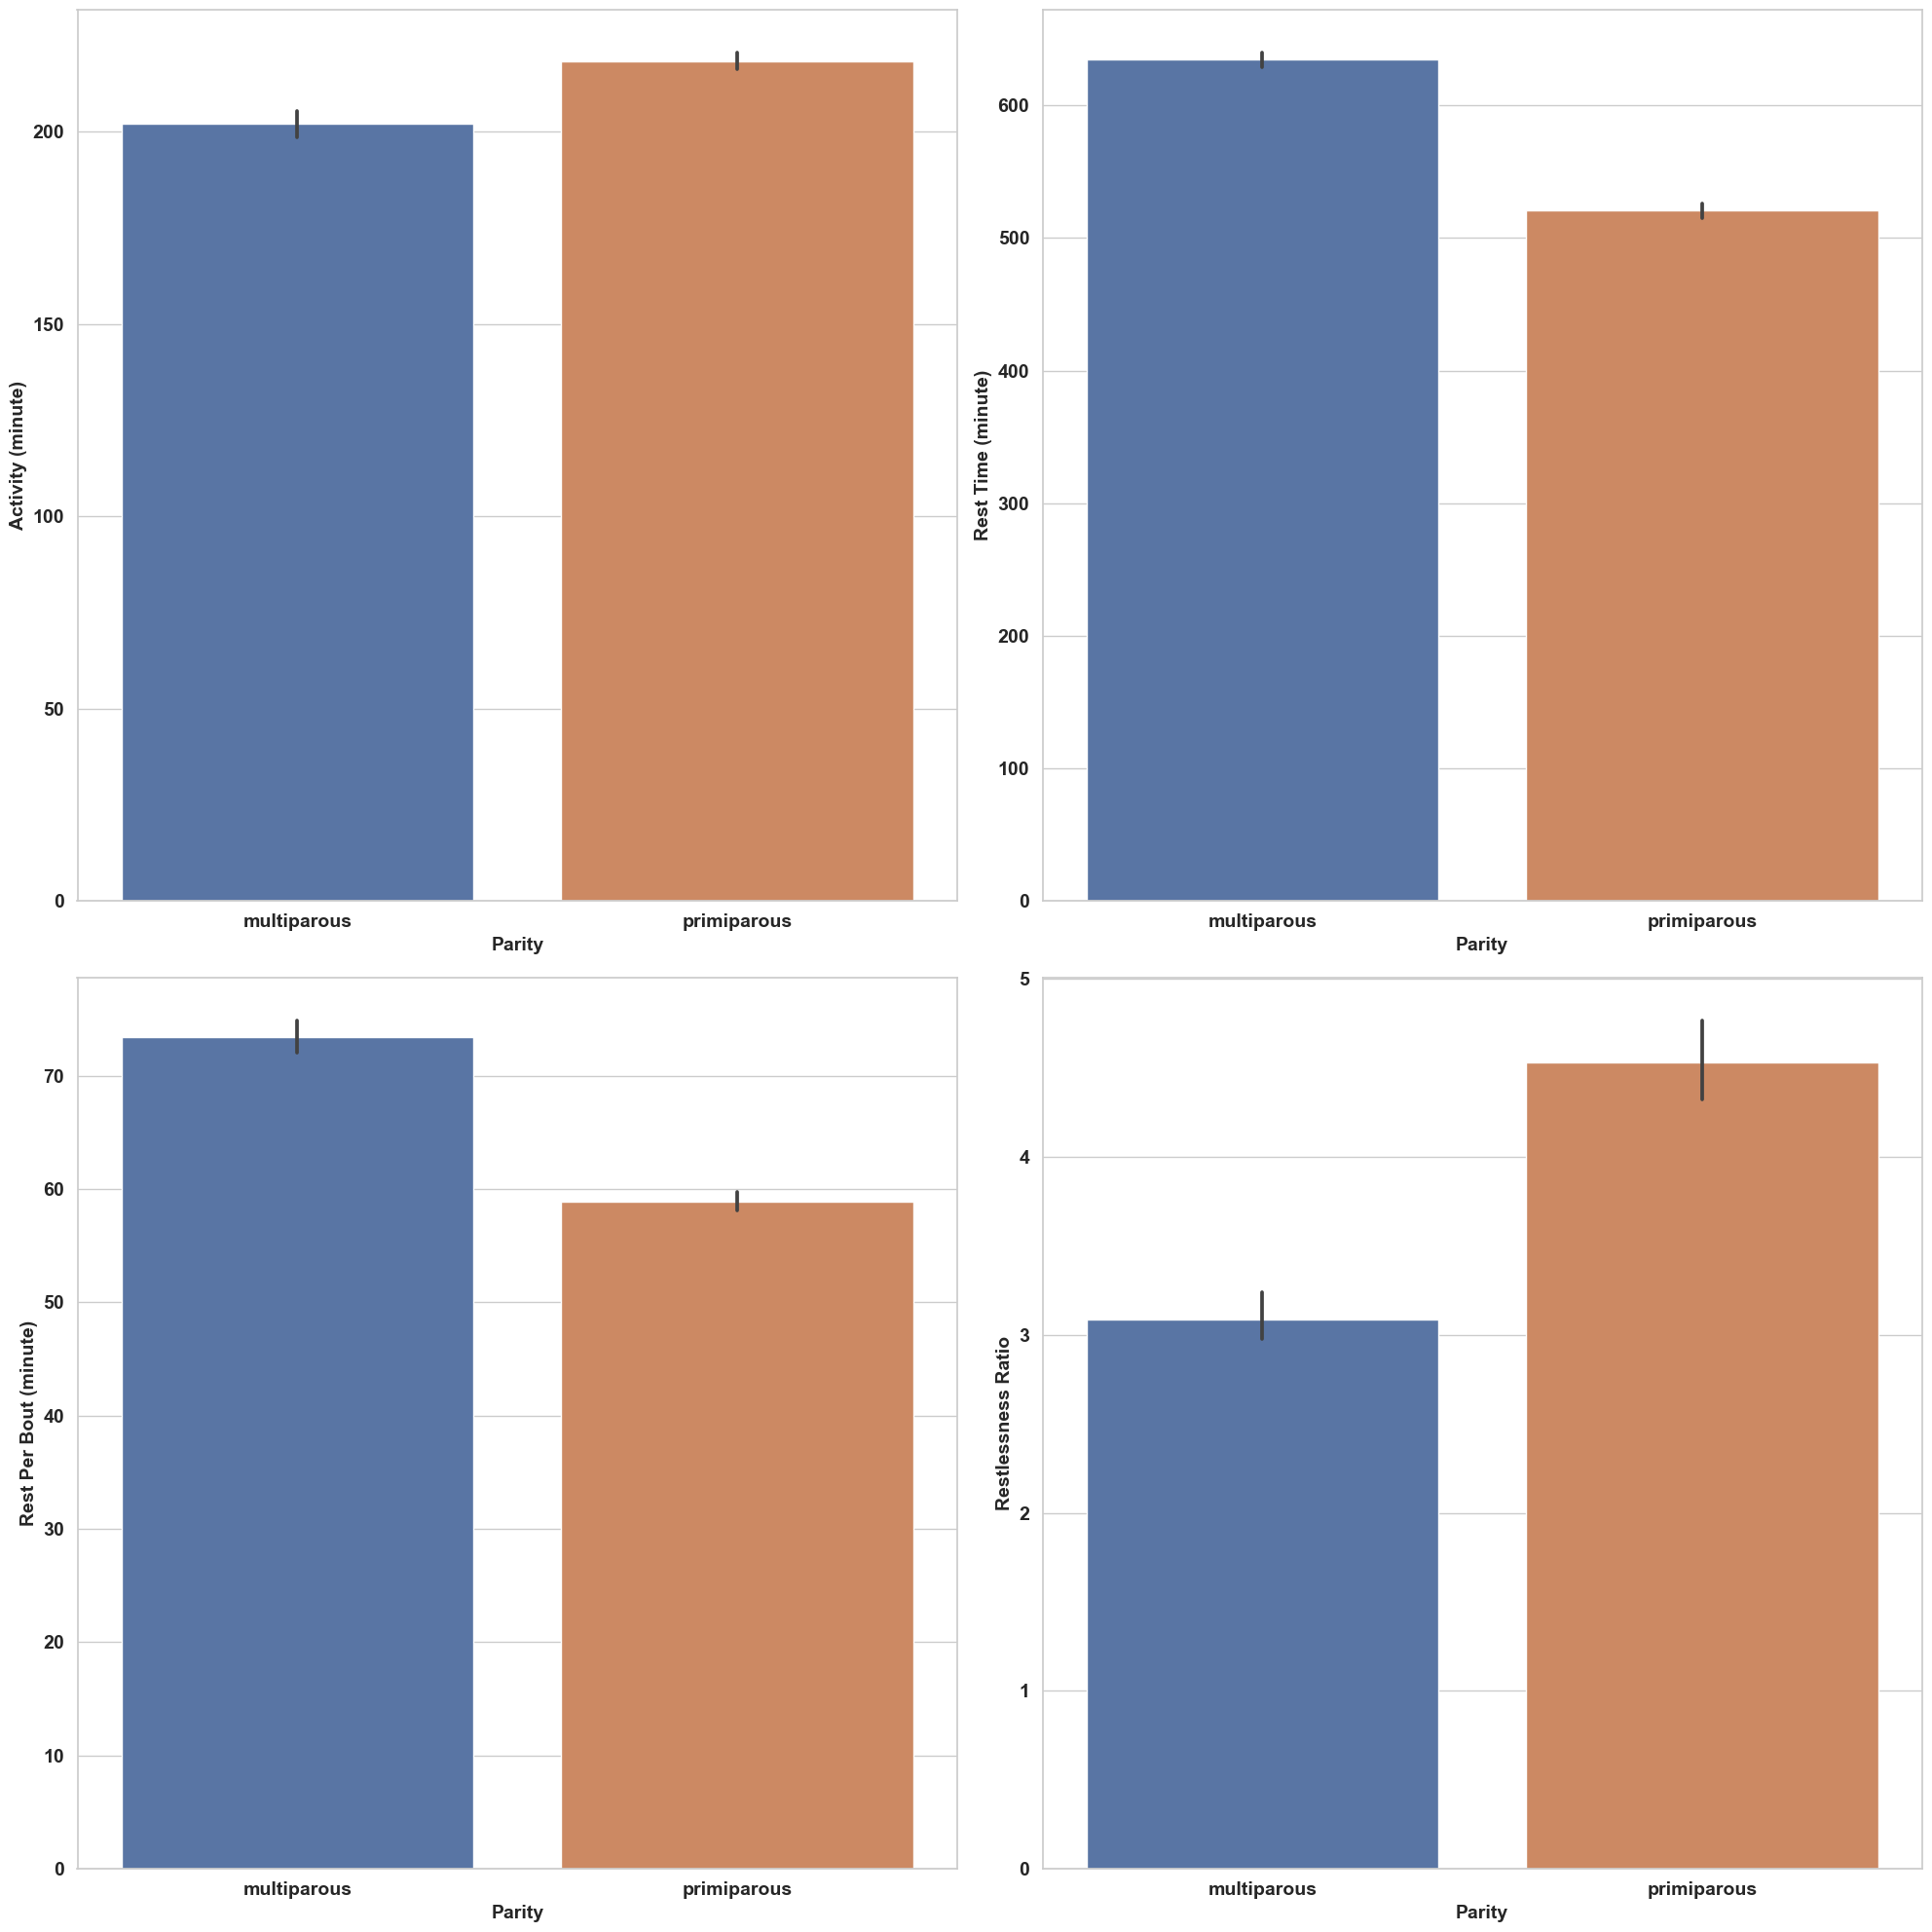

In [49]:
#Setting the background for charts
sns.set_style('whitegrid')
#Setting the figure size for chart
plt.figure(figsize=(20, 20))

#Plot 1: Activity
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='parity', y='activity')
#Setting the label, & ticks
plt.xlabel('Parity', fontsize=14, fontweight='bold')
plt.ylabel('Activity (minute)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

#Plot 2: Rest Time
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='parity', y='rest_time')
#Setting the label, & ticks
plt.xlabel('Parity', fontsize=14, fontweight='bold')
plt.ylabel('Rest Time (minute)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

#Plot 3: Rest Per Bout
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='parity', y='rest_per_bout')
#Setting the label, & ticks
plt.xlabel('Parity', fontsize=14, fontweight='bold')
plt.ylabel('Rest Per Bout (minute)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

#Plot 4: Restlessness Ratio
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='parity', y='restlessness_ratio')
#Setting the label, & ticks
plt.xlabel('Parity', fontsize=14, fontweight='bold')
plt.ylabel('Restlessness Ratio', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.tight_layout()

#Show the chart
#plt.show()
#Save the charts
plt.savefig('comparison of numerical_variables_with_parity_whole_dataset.jpg', dpi=300)

# Comparing activity, rest time, rest per bout, restlessness ratio with parity (single animal)

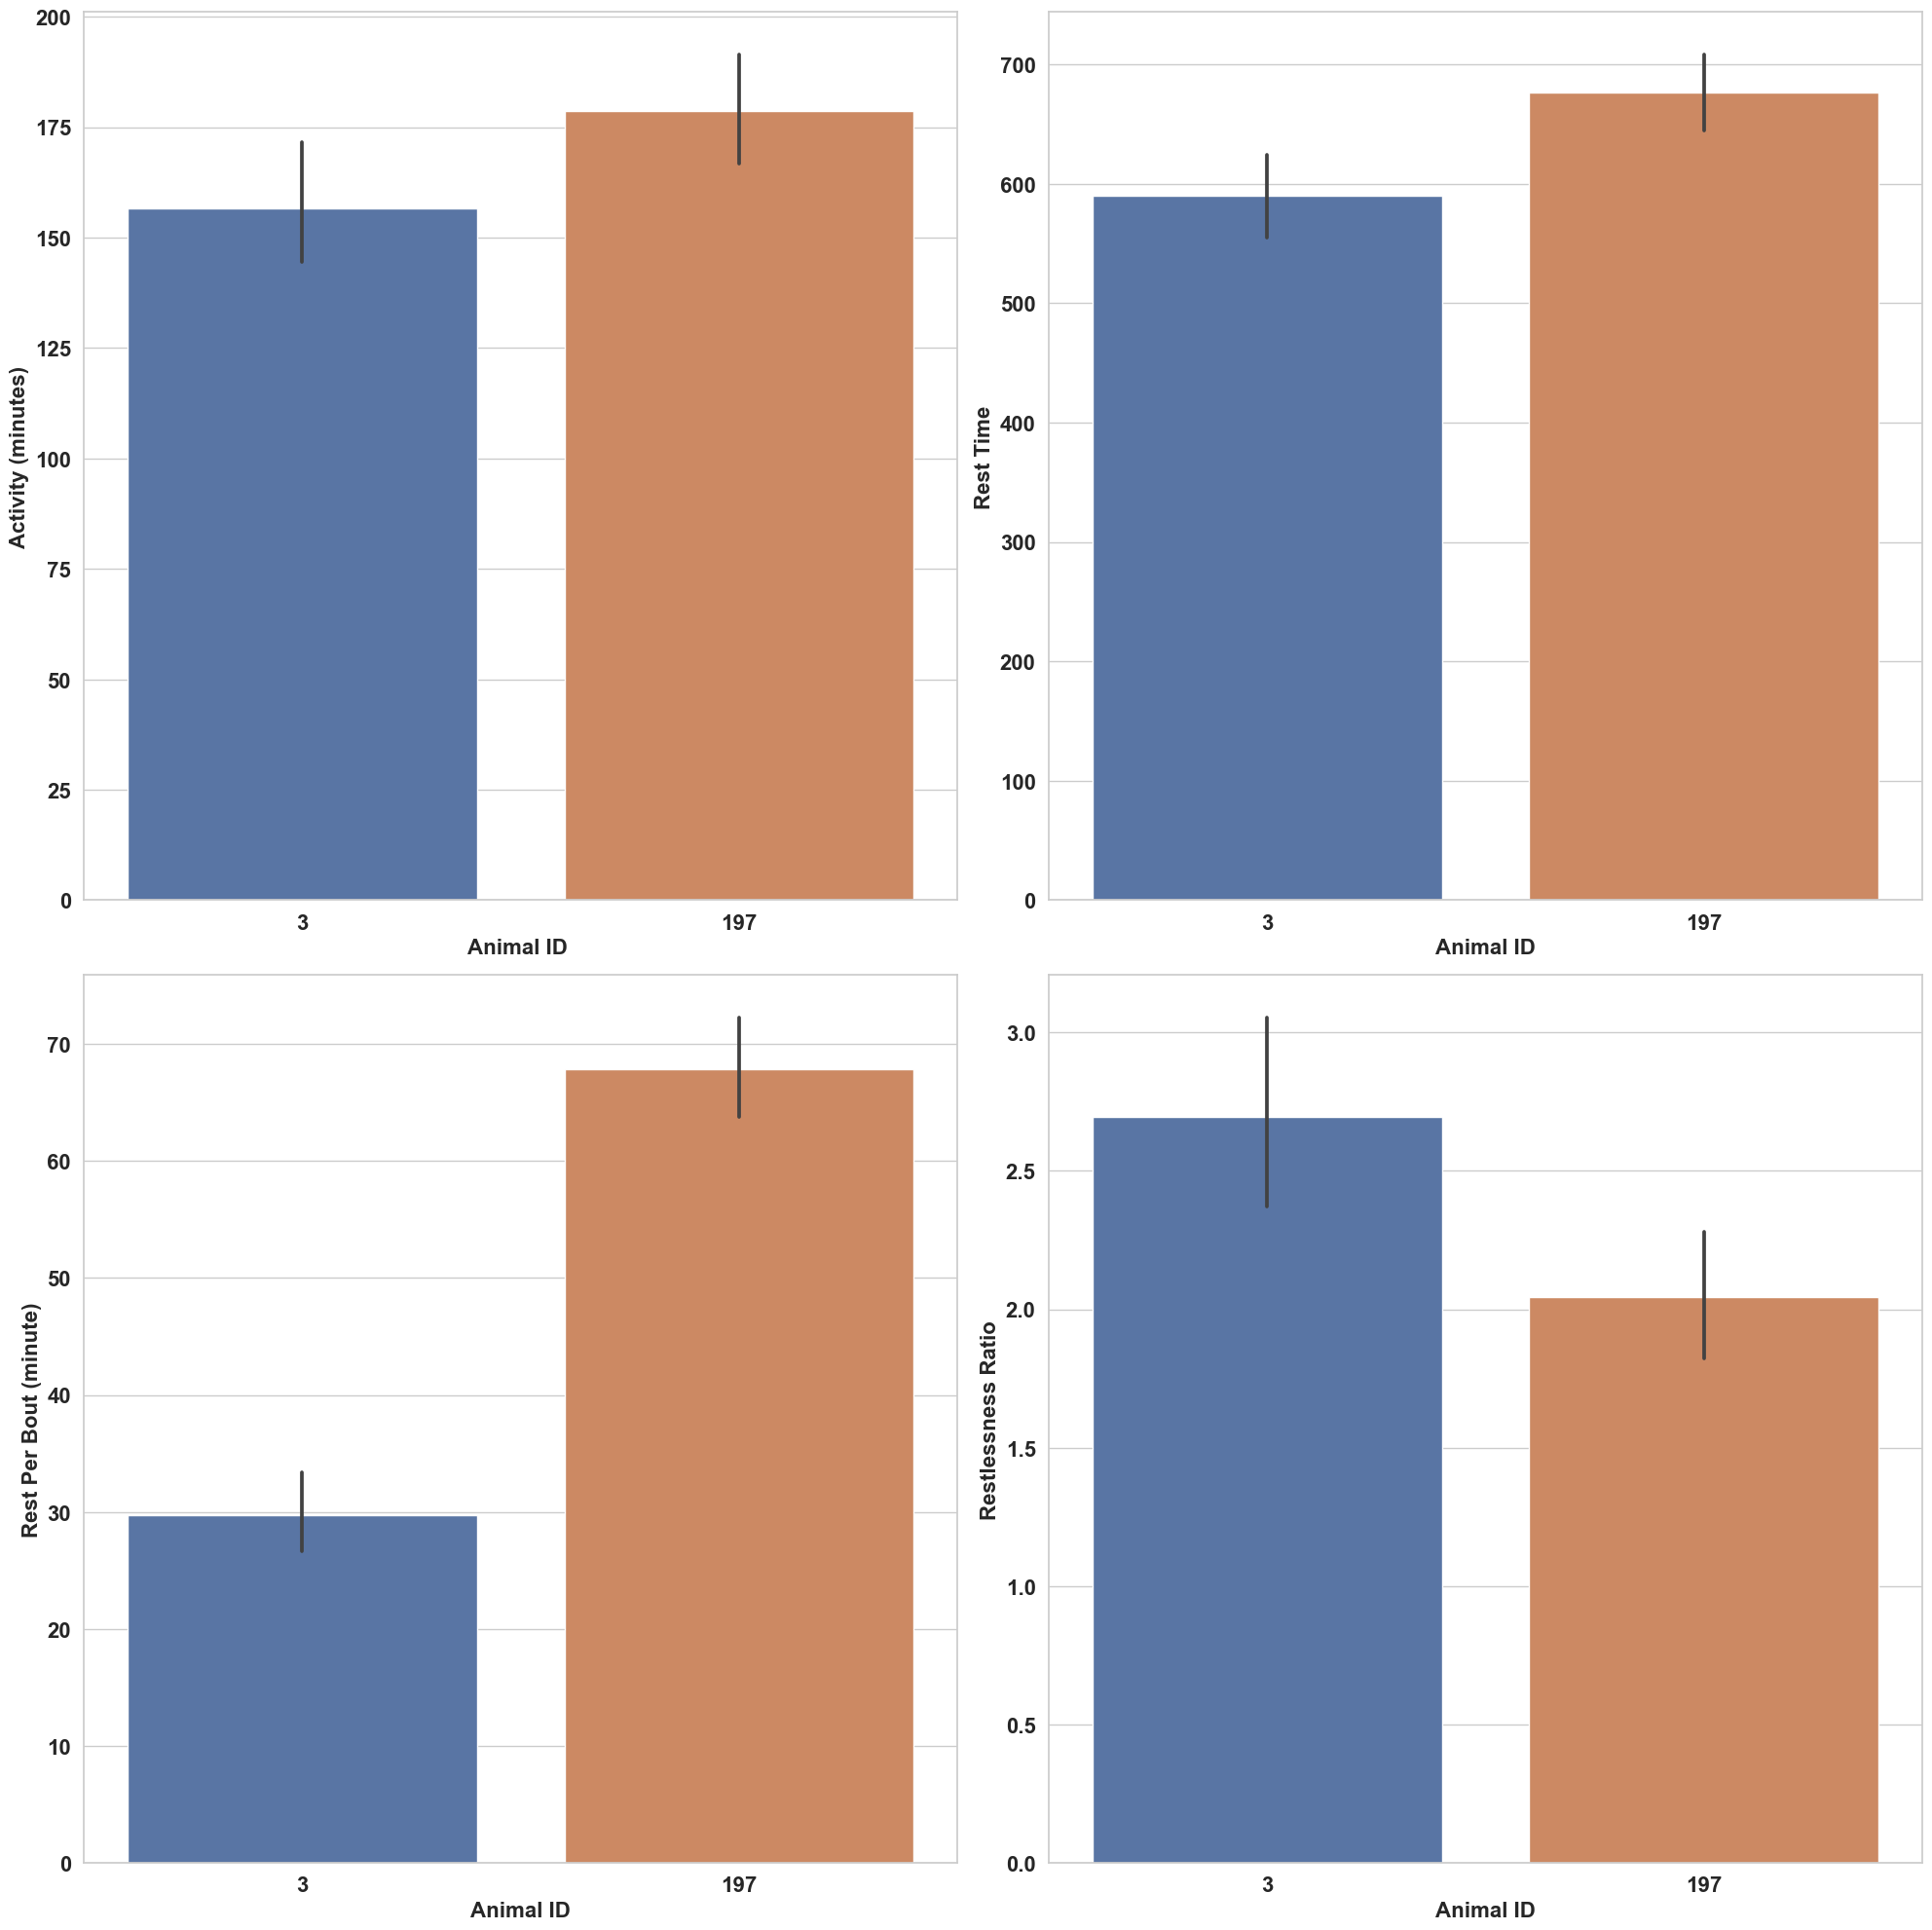

In [50]:
#Setting the background style for charts
sns.set_style('whitegrid')
#Setting the figure size for chart
plt.figure(figsize=(20, 20))

#Filtering the specific animal IDs
animal_id = [3, 197]
animal_data = df[df['cow_id'].isin(animal_id)]

#Plot 1: Activity
plt.subplot(2, 2, 1)
sns.barplot(data=animal_data, x='cow_id', y='activity')
#Setting the label, & ticks
plt.xlabel('Animal ID ', fontsize=16, fontweight='bold')
plt.ylabel('Activity (minutes)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Plot 2: Rest Time
plt.subplot(2, 2, 2)
sns.barplot(data=animal_data, x='cow_id', y='rest_time')
#Setting the label & ticks 
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Rest Time', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Plot 3: Rest Per Bout
plt.subplot(2, 2, 3)
sns.barplot(data=animal_data, x='cow_id', y='rest_per_bout')
#Setting the label, & ticks
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Rest Per Bout (minute)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Plot 4: Restlessness Ratio
plt.subplot(2, 2, 4)
sns.barplot(data=animal_data, x='cow_id', y='restlessness_ratio')
#Setting label, & ticks 
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Restlessness Ratio', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()

#Show the chart
#plt.show()
#Save the charts 
plt.savefig('comparison_of_numerical_variables_with_parity_single_animal.jpg', dpi=300)

# Box plot

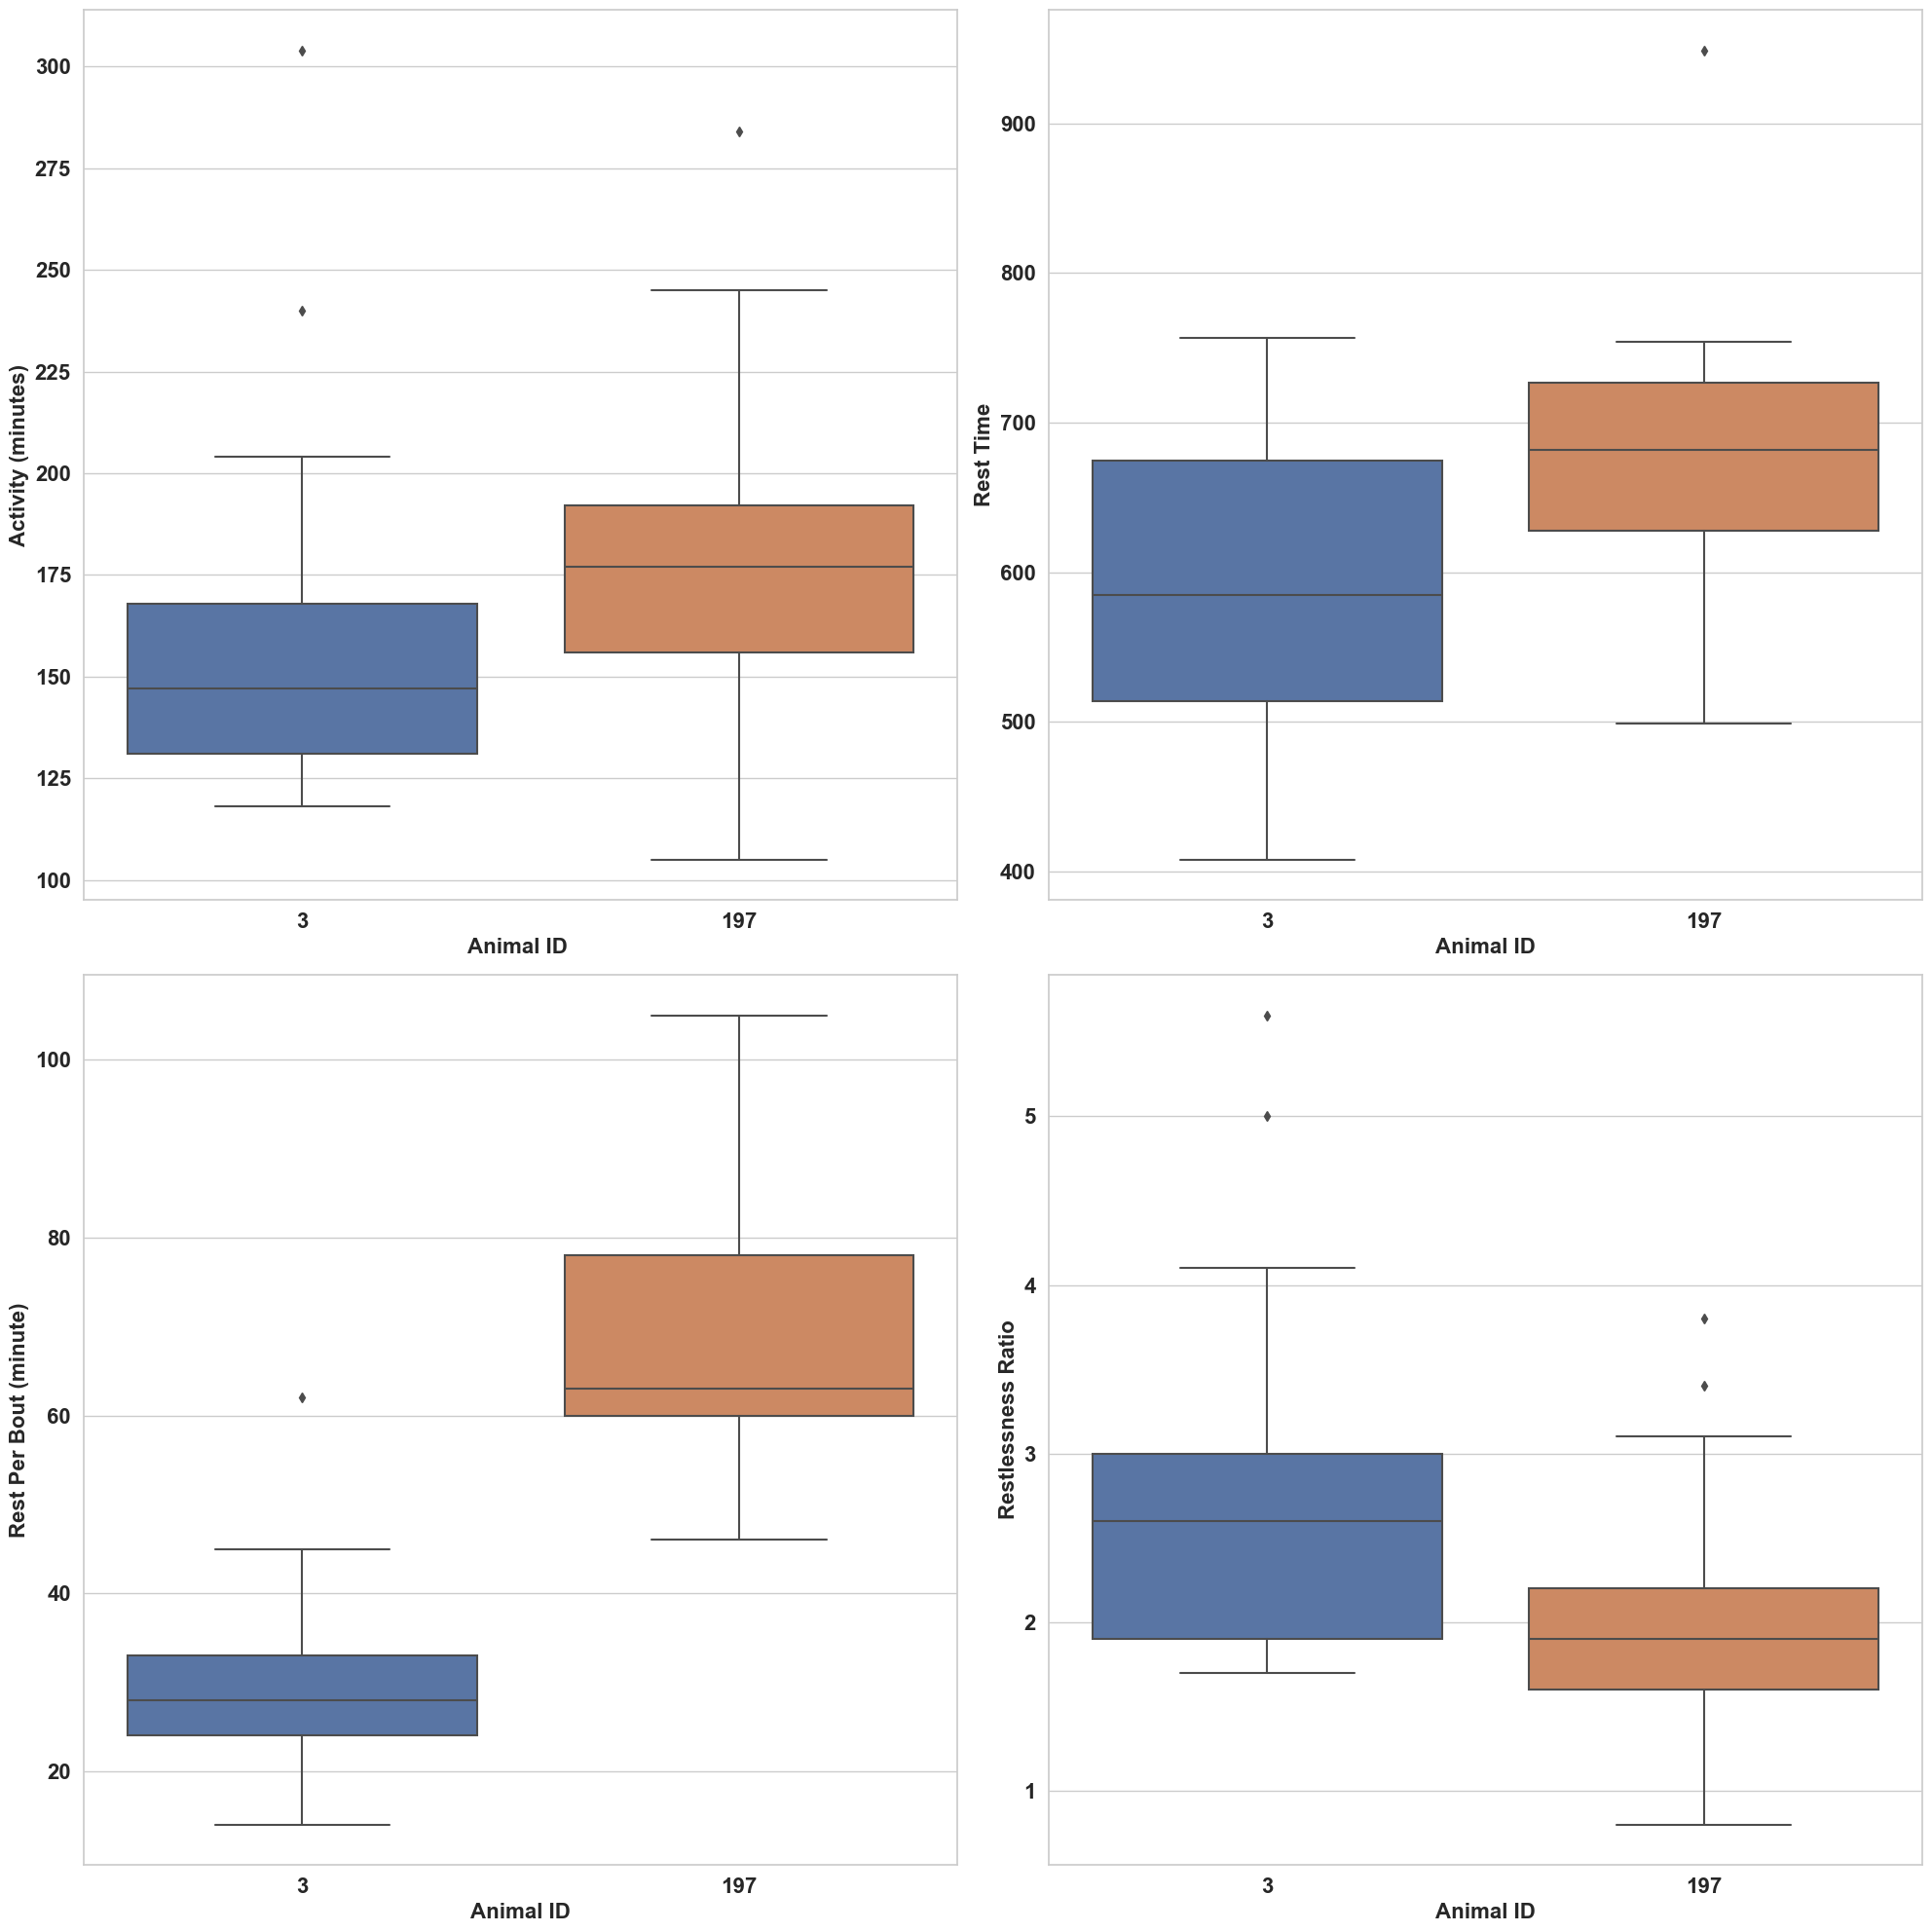

In [51]:
#Setting the background style for charts
sns.set_style('whitegrid')
#Setting the figure size
plt.figure(figsize=(20, 20))
#Filtering the specific animal IDs
animal_id = [3, 197]
animal_data = df[df['cow_id'].isin(animal_id)]

#Plot 1: Activity
plt.subplot(2, 2, 1)
sns.boxplot(data=animal_data, x='cow_id', y='activity')
#Setting the label, & ticks
plt.xlabel('Animal ID ', fontsize=16, fontweight='bold')
plt.ylabel('Activity (minutes)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

#Plot 2: Rest Time
plt.subplot(2, 2, 2)
sns.boxplot(data=animal_data, x='cow_id', y='rest_time')
#Setting the label & ticks 
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Rest Time', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

#Plot 3: Rest Per Bout
plt.subplot(2, 2, 3)
sns.boxplot(data=animal_data, x='cow_id', y='rest_per_bout')
#Setting the label, & ticks
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Rest Per Bout (minute)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

#Plot 4: Restlessness Ratio
plt.subplot(2, 2, 4)
sns.boxplot(data=animal_data, x='cow_id', y='restlessness_ratio')
#Setting label, & ticks 
plt.xlabel('Animal ID', fontsize=16, fontweight='bold')
plt.ylabel('Restlessness Ratio', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()

#Show the chart
plt.show()

# Calculating 25th, 50th, & 75th percentiles

### Single Animal

In [52]:
##Selecting animal id 
animal_id = 3
#Filtering dataframe for selecetd animal 
animal_data = df[df['cow_id']==animal_id]

#Filterig variable of inerests 
variables_of_interest = ['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']

#Calculating the percentiles for selecetd animal 
percentiles_dict = {}
for variable in variables_of_interest:
    percentiles_dict[variable] = {
        '25th Percentile': np.percentile(animal_data[variable], 25),
        '50th Percentile': np.percentile(animal_data[variable], 50),
        '75th Percentile': np.percentile(animal_data[variable], 75)
    }
    
#Printing the results 
print(f'Percentiles for Animal ID:{animal_id}')
for variable, percentiles in percentiles_dict.items():
    print(f'variable:')
    print(f"  25th Percentile: {percentiles['25th Percentile']}")
    print(f"  50th Percentile: {percentiles['50th Percentile']}")
    print(f"  75th Percentile: {percentiles['75th Percentile']}")   

Percentiles for Animal ID:3
variable:
  25th Percentile: 131.0
  50th Percentile: 147.0
  75th Percentile: 168.0
variable:
  25th Percentile: 514.0
  50th Percentile: 585.0
  75th Percentile: 675.0
variable:
  25th Percentile: 24.0
  50th Percentile: 28.0
  75th Percentile: 33.0
variable:
  25th Percentile: 1.9
  50th Percentile: 2.6
  75th Percentile: 3.0


# Whole Dataset

In [53]:
#Filterig variable of inerests 
variables_of_interest = ['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']

#Calculating the percentiles for wholw dataset 
percentiles_dict = {}
for variable in variables_of_interest:
    percentiles_dict[variable] = {
        '25th Percentile': np.percentile(df[variable], 25),
        '50th Percentile': np.percentile(df[variable], 50),
        '75th Percentile': np.percentile(df[variable], 75)
    }
#Printing the results 
print(f'Percentiles for Whole Data')
for variable, percentiles in percentiles_dict.items():
    print(f'variable:')
    print(f"  25th Percentile: {percentiles['25th Percentile']}")
    print(f"  50th Percentile: {percentiles['50th Percentile']}")
    print(f"  75th Percentile: {percentiles['75th Percentile']}") 

Percentiles for Whole Data
variable:
  25th Percentile: 156.0
  50th Percentile: 192.0
  75th Percentile: 241.0
variable:
  25th Percentile: 457.0
  50th Percentile: 552.0
  75th Percentile: 652.0
variable:
  25th Percentile: 44.0
  50th Percentile: 58.0
  75th Percentile: 73.0
variable:
  25th Percentile: 2.2
  50th Percentile: 3.1
  75th Percentile: 4.4


# Calculating Skewness and Kurtosis

In [54]:
#Importing library
from scipy.stats import skew, kurtosis

#Filtering variables for calculation of skewness and kurtosis
dataset_skewness = df[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']].apply(skew)
dataset_kurtosis = df[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']].apply(kurtosis)

#Printing the results
print('Skewness for whole Dataset:')
print(dataset_skewness)
print('\nKurtosis for whole Dataset:')
print(dataset_kurtosis)

Skewness for whole Dataset:
activity               2.303416
rest_time            -15.056678
rest_per_bout          5.267119
restlessness_ratio    28.458851
dtype: float64

Kurtosis for whole Dataset:
activity                 8.585724
rest_time              456.919892
rest_per_bout          154.162745
restlessness_ratio    1004.183912
dtype: float64


# Single Animal (Skewness & Kurtosis)

In [55]:
#Filtering sepcific animal ID
animal_id = 3
#Filtering dataset for specific animal ID
animal_data = df[df['cow_id'] == animal_id]

#Calculating the skewness & kurtosis 
animal_dataset_skewness = animal_data[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']].apply(skew)
animal_dataset_kurtosis = animal_data[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']].apply(kurtosis)

#Printing the results 
print('Skewness for Animal ID {animal_id}:')
print(animal_dataset_skewness)
print('\n Kurtosis for Animal ID {animal_id}:')
print(animal_dataset_kurtosis)

Skewness for Animal ID {animal_id}:
activity              2.297408
rest_time             0.016510
rest_per_bout         1.467618
restlessness_ratio    1.408927
dtype: float64

 Kurtosis for Animal ID {animal_id}:
activity              5.812934
rest_time            -1.039082
rest_per_bout         3.283750
restlessness_ratio    1.657428
dtype: float64


# Chi-square analysis

### Library

In [56]:
#Importing library 
import scipy.stats as stats

### Data filteration

In [57]:
#Filtering the data with respect to pairty
primiparous_data = df[df['parity'] == 'primiparous']
multiparous_data = df[df['parity'] == 'multiparous']

### Independent t-test

In [58]:
#Calculating independent t-test for numerical variables 
results_activity = stats.ttest_ind(primiparous_data['activity'], multiparous_data['activity'])
results_rest_time = stats.ttest_ind(primiparous_data['rest_time'], multiparous_data['rest_time'])
results_rest_per_bout = stats.ttest_ind(primiparous_data['rest_per_bout'], multiparous_data['rest_per_bout'])
results_resltlessness_ratio = stats.ttest_ind(primiparous_data['restlessness_ratio'], multiparous_data['restlessness_ratio'])

In [59]:
#Printing the results:
print('Comparison of Mean between Primiparous & Multiparous cows:')
print('Activity t-statistics:', results_activity.statistic)
print('Rest Time t-statistics:', results_rest_time.statistic)
print('Rest Per Bout t-statistics:', results_rest_per_bout.statistic)
print('Restlessness Ratio t-statistics:', results_resltlessness_ratio.statistic)

Comparison of Mean between Primiparous & Multiparous cows:
Activity t-statistics: 7.898890356183253
Rest Time t-statistics: -22.470057826431603
Rest Per Bout t-statistics: -18.630781116042815
Restlessness Ratio t-statistics: 7.92884772756063


# Chi-square for categorical variables

### Library

In [60]:
#Importing library
import scipy.stats as stats

In [61]:
# Filtering the dataframe for categorical variables
data = df[['calv_time', 'manner_of_calving', 'parity']]
#Performing chi-square analysis
chi2_results = {}
for var in data.columns:
    observed = pd.crosstab(data[var], df['days_after_calving'])
    chi2, p_value, _, _ = stats.chi2_contingency(observed)
    chi2_results[var] = {'chi2': chi2, 'p_value': p_value}
#Printing the results
for var, result in chi2_results.items():
    print(f"Chi-square analysis for variable: {var}")
    print("Chi-square value:", result['chi2'])
    print("p-value:", result['p_value'])
    print()

Chi-square analysis for variable: calv_time
Chi-square value: 0.0
p-value: 1.0

Chi-square analysis for variable: manner_of_calving
Chi-square value: 0.0
p-value: 1.0

Chi-square analysis for variable: parity
Chi-square value: 0.0
p-value: 1.0



# Survival Analysis 

In [62]:
#Importing libraries
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter 

In [63]:
#Converting calving time variable into proper format
df['calv_time'] = df['calv_time'].str.split(':').apply(lambda x: int(x[0])* 60 + int(x[1]))

In [64]:
#Filtering the variables for survival analysis 
data = df[['days_after_calving', 'calv_time', 'activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio']]
#Creating a Kaplan-Meier estimator
kmf = KaplanMeierFitter()
#Fitting the survival data and calculating the survival function
kmf.fit(data['days_after_calving'], event_observed=data['calv_time'])
survival_function = kmf.survival_function_

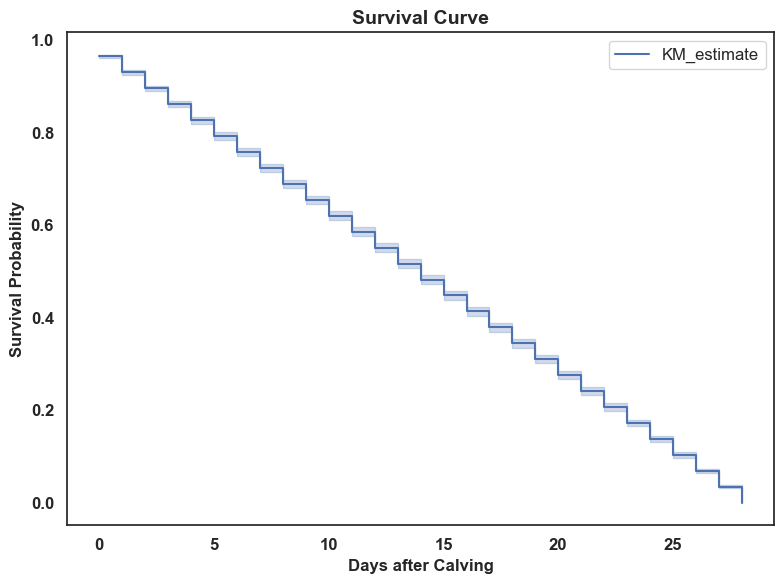

In [65]:
#Setting the background
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(8,6))
# Plotting the survival curve
kmf.plot()
#Setting label, title, & ticks
plt.xlabel('Days after Calving', fontsize=12, fontweight='bold')
plt.ylabel('Survival Probability', fontsize=12, fontweight='bold')
plt.title('Survival Curve', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
#Show the chart
plt.show()

In [66]:
#Performing Cox propotional hazard regression 
cph = CoxPHFitter()
cph.fit(data, duration_col='days_after_calving', event_col='calv_time')
#Printing the results
print(cph.summary)

                        coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                           
activity            0.002725   1.002728  0.000097        0.002535   
rest_time          -0.000011   0.999989  0.000077       -0.000162   
rest_per_bout       0.003820   1.003827  0.000242        0.003345   
restlessness_ratio  0.008727   1.008765  0.002065        0.004680   

                    coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                      
activity                  0.002915             1.002538             1.002919   
rest_time                 0.000140             0.999838             1.000140   
rest_per_bout             0.004294             1.003351             1.004304   
restlessness_ratio        0.012773             1.004691             1.012855   

                    cmp to          z              p    -log2(p)  
covariate                            

# Model 1: (Mixed GLMM)

### Library

In [67]:
#Importing library
import statsmodels.api as sm

### Data filteration

In [68]:
# Filtering the variables
data = df[['activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio', 'offspring', 'days_after_calving', 
           'manner_of_calving', 'parity', 'cow_id']]

In [69]:
# Generating the GLMM formula
formula = "activity ~ rest_time + rest_per_bout + restlessness_ratio + offspring + days_after_calving + manner_of_calving + parity + cow_id"
# Specifying the group
groups = df['cow_id']
# Fitting the developed model
model = sm.MixedLM.from_formula(formula, groups=groups, data=data)
result = model.fit()
# Printing the result
print(result.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     activity   
No. Observations:     10121       Method:                 REML       
No. Groups:           348         Scale:                  5168.6830  
Min. group size:      29          Log-Likelihood:         -58035.4811
Max. group size:      58          Converged:              Yes        
Mean group size:      29.1                                           
---------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              227.043   26.046   8.717 0.000 175.994 278.092
parity[T.primiparous]   12.322    5.266   2.340 0.019   2.001  22.643
rest_time               -0.020    0.007  -2.905 0.004  -0.033  -0.006
rest_per_bout            0.342    0.027  12.794 0.000   0.290   0.395
restlessness_ratio       2.260    0.

# Model 2 (Mixed GLMM Model)

In [70]:
# Filtering the dataset with respect to parity
filtered_df = df[df['parity'].isin(['primiparous','multiparous'])]
# Creating the formula for the GLMM model
formula = 'activity ~ rest_time + rest_per_bout + restlessness_ratio + (1 + cow_id | cow_id)'
# Fitting the developed GLMM model using the filtered data
model = sm.MixedLM.from_formula(formula, groups='cow_id', data=filtered_df)
result = model.fit()
# Printing the developed GLMM model results
print(result.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   activity   
No. Observations:     10121     Method:               REML       
No. Groups:           348       Scale:                6121.1251  
Min. group size:      29        Log-Likelihood:       -58869.5282
Max. group size:      58        Converged:            Yes        
Mean group size:      29.1                                       
-----------------------------------------------------------------
                    Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           167.158    5.501 30.387 0.000 156.377 177.940
rest_time            -0.015    0.007 -2.112 0.035  -0.030  -0.001
rest_per_bout         0.601    0.028 21.316 0.000   0.545   0.656
restlessness_ratio    3.253    0.192 16.973 0.000   2.877   3.629
cow_id | cow_id       0.004    0.001  3.326 0.001   0.001   0.006
cow_id Var         1593.

# Model 3: Random Effect GLMM

In [71]:
formula = "activity ~ rest_time + rest_per_bout + restlessness_ratio + (1 + cow_id | cow_id)"
# Fit the GLMM model with random effects
model = sm.MixedLM.from_formula(formula, groups='cow_id', data=df)
result = model.fit()

# Print the GLMM model results
print(result.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   activity   
No. Observations:     10121     Method:               REML       
No. Groups:           348       Scale:                6121.1251  
Min. group size:      29        Log-Likelihood:       -58869.5282
Max. group size:      58        Converged:            Yes        
Mean group size:      29.1                                       
-----------------------------------------------------------------
                    Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           167.158    5.501 30.387 0.000 156.377 177.940
rest_time            -0.015    0.007 -2.112 0.035  -0.030  -0.001
rest_per_bout         0.601    0.028 21.316 0.000   0.545   0.656
restlessness_ratio    3.253    0.192 16.973 0.000   2.877   3.629
cow_id | cow_id       0.004    0.001  3.326 0.001   0.001   0.006
cow_id Var         1593.

# Table 1: Least Square Mean (LSM) with standard error (Word format)

### Library

In [72]:
#Importing library
from docx import Document

# Data Filteration

In [73]:
# Filtering the dataset with variables of interest
filtered_data = df[['days_after_calving', 'activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio', 'parity']]

# Calculating the adjusted LSM for each variable, accounting for parity
lsmeans = filtered_data.groupby(['days_after_calving', 'parity']).mean().reset_index()

# Calculating standard error for each variable
se = filtered_data.groupby(['days_after_calving', 'parity']).std() / filtered_data.groupby(['days_after_calving', 'parity']).count() ** 0.5

# Creating Table

In [74]:
# Creating the table
table = []
for _, row in lsmeans.iterrows():
    table_row = [
        row['days_after_calving'],
        row['activity'],
        row['rest_time'],
        row['rest_per_bout'],
        row['restlessness_ratio'],
        row['parity'],
    ]
    table.append(table_row)

# Adding the standard errors to the table
for i, (_, se_row) in enumerate(se.iterrows()):
    table[i].extend(se_row.tolist()[1:])

# Headers for tables

In [75]:
# Header for the table
headers = ['Days after calving', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Parity', 'SE Activity', 
          'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']

# Creating a new word document
doc = Document()

# Adding table to the document
table_docx = doc.add_table(rows=1, cols=len(headers))

# Header for the table
header_row = table_docx.rows[0]
for i, header in enumerate(headers):
    header_row.cells[i].text = header

# Adding data rows to the table
for row_data in table:
    row_cells = table_docx.add_row().cells
    for i, cell_value in enumerate(row_data):
        row_cells[i].text = str(cell_value)

# Saving the word document
doc.save('calving_after_28_day.docx')

# Table 1: Least Square Mean (LSM) with standard error (Excel format)

### Library

In [76]:
#Importing library
from tabulate import tabulate

### Data filteration

In [77]:
#Filtering dataset with relevant variables
filtered_data = df[['days_after_calving', 'activity', 'rest_time', 'rest_per_bout', 'restlessness_ratio', 'parity']]

### Calculation of LSM mean for specific variables

In [78]:
#Calculating the adjusted LSM for each variable, accounting for parity
lsmeans = filtered_data.groupby(['days_after_calving', 'parity']).mean().reset_index()

### Calculation of standard error

In [79]:
#Calculating the standard error for each variable
se = filtered_data.groupby(['days_after_calving', 'parity']).std() / filtered_data.groupby(['days_after_calving', 'parity']).count() ** 0.5

### Creating the table¶

In [80]:
#Creating the table
table = []
for _, row in lsmeans.iterrows():
    table_row = [
        row['days_after_calving'],
        row['activity'],
        row['rest_time'],
        row['rest_per_bout'],
        row['restlessness_ratio'],
        row['parity'],
    ]
    table.append(table_row)

### Adding the standard error

In [81]:
#Adding standard errors to the table
for i, (_, se_row) in enumerate(se.iterrows()):
    table[i].extend(se_row.tolist())

### Printing the table

In [82]:
#Printing the table
print(tabulate(table, headers=headers, tablefmt="pipe"))

|   Days after calving |   Activity |   Rest Time |   Rest Per Bout |   Restlessness Ratio | Parity      |   SE Activity |   SE Rest Time |   SE Rest Per Bout |   SE Restlessness Ratio |
|---------------------:|-----------:|------------:|----------------:|---------------------:|:------------|--------------:|---------------:|-------------------:|------------------------:|
|                    0 |    279.375 |     704.219 |         58.9062 |              4.4916  | multiparous |      11.8413  |       31.2477  |            1.73009 |                0.321207 |
|                    0 |    306.182 |     594.079 |         60.5889 |              5.74336 | primiparous |       7.40585 |       16.6061  |            0.86883 |                0.206002 |
|                    1 |    330.5   |     540.521 |         88.2604 |              6.45416 | multiparous |      13.1196  |       19.3689  |           11.5985  |                0.483153 |
|                    1 |    339.423 |     463.312 |         65.30

### Saving the created table

In [83]:
# Creating a DataFrame from developed table data
df_table = pd.DataFrame(table, columns=headers)

# Saving the DataFrame to Excel
df_table.to_excel('table_output_updated.xlsx', index=False)